In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set() 
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker

## 1. DATA COLLECTION

In [2]:
data_income = pd.read_csv('Income.csv')
data_expense = pd.read_csv('Expense.csv')

ข้อมูลที่จะนําไปใช้มาจาก 2 ตารางซึ่งจะเป็นข้อมูล

- ค่าใช้จ่ายของครัวเรือน
- รายได้ของครัวเรือน

## 2. DATA CLEANING

## 2.1 Cleaning Income Table

In [3]:
df_income = data_income
df_income.info()
df_income.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           2640 non-null   int64  
 1   region         2640 non-null   object 
 2   source_income  2640 non-null   object 
 3   soc_eco_class  2640 non-null   object 
 4   value          2632 non-null   float64
 5   unit           2640 non-null   object 
 6   source         2640 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 144.5+ KB


,year,region,source_income,soc_eco_class,value,unit,source
0,2554,ทั่วประเทศ,รายได้ทั้งสิ้น (รวม),รวม,23236.0,บาทต่อเดือน,สำนักงานสถิติแห่งชาติ
1,2554,ทั่วประเทศ,รายได้ทั้งสิ้น (รวม),ผู้ถือครองทำการเกษตร การปลูกพืช การเลี้ยงสัตว์...,20378.0,บาทต่อเดือน,สำนักงานสถิติแห่งชาติ
2,2554,ทั่วประเทศ,รายได้ทั้งสิ้น (รวม),ผู้ถือครองทำการเกษตร การปลูกพืช การเลี้ยงสัตว์...,18238.0,บาทต่อเดือน,สำนักงานสถิติแห่งชาติ


In [4]:
df_income.isna().sum()  

year             0
region           0
source_income    0
soc_eco_class    0
value            8
unit             0
source           0
dtype: int64

In [5]:
income_column = df_income.columns.values.tolist()
for col in income_column:
    print(f'{col.upper()}: {df_income[col].unique()}')

YEAR: [2554 2556 2558 2560 2562]
REGION: ['ทั่วประเทศ' 'กรุงเทพ นนทบุรี ปทุมธานี และสมุทรปราการ' 'ภาคกลาง'
 'ภาคเหนือ' 'ภาคตะวันออกเฉียงเหนือ' 'ภาคใต้']
SOURCE_INCOME: ['รายได้ทั้งสิ้น (รวม)' 'รายได้ประจำ (รวม)'
 'รายได้ประจำที่เป็นตัวเงิน (รวม)'
 'รายได้ประจำที่เป็นตัวเงิน (รายได้จากการทำงาน)'
 'รายได้ประจำที่เป็นตัวเงิน (เงินได้รับเป็นการช่วยเหลือ)'
 'รายได้ประจำที่เป็นตัวเงิน (รายได้จากทรัพย์สิน)'
 'รายได้ประจำที่ไม่เป็นตัวเงิน (รวม)'
 'รายได้ไม่ประจำ (รายได้ที่เป็นตัวเงิน)']
SOC_ECO_CLASS: ['รวม'
 'ผู้ถือครองทำการเกษตร การปลูกพืช การเลี้ยงสัตว์ และการเพาะเลี้ยงสัตวน้ำ ซึ่งที่ดินส่วนใหญ่เป็นของตนเอง'
 'ผู้ถือครองทำการเกษตร การปลูกพืช การเลี้ยงสัตว์ และการเพาะเลี้ยงสัตวน้ำ ซึ่งที่ดินส่วนใหญ่เช่าผู้อื่น/ที่สาธารณะ/อื่น ๆ'
 'ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริการทางการเกษตร'
 'ผู้ดำเนินธุรกิจของตนเองที่ไม่ใช่การเกษตร'
 'ผู้ปฏิบัติงานวิชาชีพ นักวิชาการ และนักบริหารที่รับจ้าง' 'คนงานเกษตร'
 'คนงานทั่วไป' 'เสมียนพนักงาน พนักงานขายและให้บริการ'
 'ผู้ปฏิบัติงานในกระบวนการผลิต' 'ผู

In [6]:
#Remove initial aggregate value in table: value is not in function so if there's changes in the table, this value will be invalid

df_in = df_income.drop(columns =['source'])
df_in = df_in.replace('รายได้ประจำที่ไม่เป็นตัวเงิน (รวม)','รายได้ประจำที่ไม่เป็นตัวเงิน')
drop_string_in = ['ทั่วประเทศ','รวม']

df_in = df_in[ ~df_in.region.str.contains('|'.join(drop_string_in)) ]
df_in = df_in[ ~df_in.source_income.str.contains('|'.join(drop_string_in)) ]
df_in = df_in[ ~df_in.soc_eco_class.str.contains('|'.join(drop_string_in)) ]


In [7]:
#สํารวจ Dataset ที่เป็น Na

df_in[df_in.isna().any(axis=1)]

,year,region,source_income,soc_eco_class,value,unit
652,2562,กรุงเทพ นนทบุรี ปทุมธานี และสมุทรปราการ,รายได้ประจำที่เป็นตัวเงิน (รายได้จากการทำงาน),ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,NaN,บาทต่อเดือน
707,2562,กรุงเทพ นนทบุรี ปทุมธานี และสมุทรปราการ,รายได้ประจำที่เป็นตัวเงิน (เงินได้รับเป็นการช่...,ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,NaN,บาทต่อเดือน
762,2562,กรุงเทพ นนทบุรี ปทุมธานี และสมุทรปราการ,รายได้ประจำที่เป็นตัวเงิน (รายได้จากทรัพย์สิน),ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,NaN,บาทต่อเดือน
817,2562,กรุงเทพ นนทบุรี ปทุมธานี และสมุทรปราการ,รายได้ประจำที่ไม่เป็นตัวเงิน,ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,NaN,บาทต่อเดือน
872,2562,กรุงเทพ นนทบุรี ปทุมธานี และสมุทรปราการ,รายได้ไม่ประจำ (รายได้ที่เป็นตัวเงิน),ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,NaN,บาทต่อเดือน


In [8]:
#สํารวจเพิ่มเติมของข้อมูลที่มี na อยู่โดยดูว่ามี 0 ด้วยหรือไม่

df_adjusted = df_in.loc[(df_in['soc_eco_class'] == 'ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริการทางการเกษตร') & 
          ((df_in['value'] == 0) | (df_in['value'].isnull()))]
df_adjusted

,year,region,source_income,soc_eco_class,value,unit
608,2554,กรุงเทพ นนทบุรี ปทุมธานี และสมุทรปราการ,รายได้ประจำที่เป็นตัวเงิน (รายได้จากการทำงาน),ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,0.0,บาทต่อเดือน
641,2560,กรุงเทพ นนทบุรี ปทุมธานี และสมุทรปราการ,รายได้ประจำที่เป็นตัวเงิน (รายได้จากการทำงาน),ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,0.0,บาทต่อเดือน
652,2562,กรุงเทพ นนทบุรี ปทุมธานี และสมุทรปราการ,รายได้ประจำที่เป็นตัวเงิน (รายได้จากการทำงาน),ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,NaN,บาทต่อเดือน
663,2554,กรุงเทพ นนทบุรี ปทุมธานี และสมุทรปราการ,รายได้ประจำที่เป็นตัวเงิน (เงินได้รับเป็นการช่...,ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,0.0,บาทต่อเดือน
685,2558,กรุงเทพ นนทบุรี ปทุมธานี และสมุทรปราการ,รายได้ประจำที่เป็นตัวเงิน (เงินได้รับเป็นการช่...,ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,0.0,บาทต่อเดือน
700,2560,กรุงเทพ นนทบุรี ปทุมธานี และสมุทรปราการ,รายได้ประจำที่เป็นตัวเงิน (เงินได้รับเป็นการช่...,ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,0.0,บาทต่อเดือน
707,2562,กรุงเทพ นนทบุรี ปทุมธานี และสมุทรปราการ,รายได้ประจำที่เป็นตัวเงิน (เงินได้รับเป็นการช่...,ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,NaN,บาทต่อเดือน
718,2554,กรุงเทพ นนทบุรี ปทุมธานี และสมุทรปราการ,รายได้ประจำที่เป็นตัวเงิน (รายได้จากทรัพย์สิน),ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,0.0,บาทต่อเดือน
740,2558,กรุงเทพ นนทบุรี ปทุมธานี และสมุทรปราการ,รายได้ประจำที่เป็นตัวเงิน (รายได้จากทรัพย์สิน),ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,0.0,บาทต่อเดือน
751,2560,กรุงเทพ นนทบุรี ปทุมธานี และสมุทรปราการ,รายได้ประจำที่เป็นตัวเงิน (รายได้จากทรัพย์สิน),ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,0.0,บาทต่อเดือน


In [9]:
df_in_adjusted = df_in[(df_in['region'] == 'กรุงเทพ นนทบุรี ปทุมธานี และสมุทรปราการ') & (df_in['soc_eco_class'] =='ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริการทางการเกษตร')]
df_in_adjusted.head(5)

,year,region,source_income,soc_eco_class,value,unit
608,2554,กรุงเทพ นนทบุรี ปทุมธานี และสมุทรปราการ,รายได้ประจำที่เป็นตัวเงิน (รายได้จากการทำงาน),ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,0.0,บาทต่อเดือน
619,2556,กรุงเทพ นนทบุรี ปทุมธานี และสมุทรปราการ,รายได้ประจำที่เป็นตัวเงิน (รายได้จากการทำงาน),ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,15490.0,บาทต่อเดือน
630,2558,กรุงเทพ นนทบุรี ปทุมธานี และสมุทรปราการ,รายได้ประจำที่เป็นตัวเงิน (รายได้จากการทำงาน),ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,20538.0,บาทต่อเดือน
641,2560,กรุงเทพ นนทบุรี ปทุมธานี และสมุทรปราการ,รายได้ประจำที่เป็นตัวเงิน (รายได้จากการทำงาน),ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,0.0,บาทต่อเดือน
652,2562,กรุงเทพ นนทบุรี ปทุมธานี และสมุทรปราการ,รายได้ประจำที่เป็นตัวเงิน (รายได้จากการทำงาน),ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,NaN,บาทต่อเดือน


อย่างน้อยรายได้ประจําจากการทํางานไม่ควรเป็น nan หรือ 0

In [10]:
df_in_adjusted = df_in_adjusted.fillna(0)
df_in_adjusted.head(5)

,year,region,source_income,soc_eco_class,value,unit
608,2554,กรุงเทพ นนทบุรี ปทุมธานี และสมุทรปราการ,รายได้ประจำที่เป็นตัวเงิน (รายได้จากการทำงาน),ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,0.0,บาทต่อเดือน
619,2556,กรุงเทพ นนทบุรี ปทุมธานี และสมุทรปราการ,รายได้ประจำที่เป็นตัวเงิน (รายได้จากการทำงาน),ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,15490.0,บาทต่อเดือน
630,2558,กรุงเทพ นนทบุรี ปทุมธานี และสมุทรปราการ,รายได้ประจำที่เป็นตัวเงิน (รายได้จากการทำงาน),ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,20538.0,บาทต่อเดือน
641,2560,กรุงเทพ นนทบุรี ปทุมธานี และสมุทรปราการ,รายได้ประจำที่เป็นตัวเงิน (รายได้จากการทำงาน),ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,0.0,บาทต่อเดือน
652,2562,กรุงเทพ นนทบุรี ปทุมธานี และสมุทรปราการ,รายได้ประจำที่เป็นตัวเงิน (รายได้จากการทำงาน),ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,0.0,บาทต่อเดือน


In [11]:
df_in_adjusted2 = df_in_adjusted[df_in_adjusted['value'] != 0]
group_adjusted = df_in_adjusted2.groupby(['source_income'])
df_in_adjusted_value = group_adjusted.agg('mean')
df_in_adjusted_value.drop(['year'], axis=1,inplace=True)
df_in_adjusted_value.reset_index()

,source_income,value
0,รายได้ประจำที่เป็นตัวเงิน (รายได้จากการทำงาน),18014.0
1,รายได้ประจำที่เป็นตัวเงิน (รายได้จากทรัพย์สิน),93.0
2,รายได้ประจำที่เป็นตัวเงิน (เงินได้รับเป็นการช่...,403.0
3,รายได้ประจำที่ไม่เป็นตัวเงิน,3041.5


In [12]:
df_in.loc[(df_in['soc_eco_class'] == 'ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริการทางการเกษตร') & 
          (df_in['source_income'] == 'รายได้ประจำที่เป็นตัวเงิน (รายได้จากการทำงาน)') &
          ((df_in['value'] == 0) | (df_in['value'].isnull()))]

,year,region,source_income,soc_eco_class,value,unit
608,2554,กรุงเทพ นนทบุรี ปทุมธานี และสมุทรปราการ,รายได้ประจำที่เป็นตัวเงิน (รายได้จากการทำงาน),ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,0.0,บาทต่อเดือน
641,2560,กรุงเทพ นนทบุรี ปทุมธานี และสมุทรปราการ,รายได้ประจำที่เป็นตัวเงิน (รายได้จากการทำงาน),ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,0.0,บาทต่อเดือน
652,2562,กรุงเทพ นนทบุรี ปทุมธานี และสมุทรปราการ,รายได้ประจำที่เป็นตัวเงิน (รายได้จากการทำงาน),ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,NaN,บาทต่อเดือน


In [13]:
#Replace value with mean 2556 and 2558 รายได้จากการทํางาน

replace_value = df_in_adjusted_value['value'].tolist()
df_in.loc[608,'value'] = replace_value[0]
df_in.loc[641,'value'] = replace_value[0]
df_in.loc[652,'value'] = replace_value[0]
df_in.fillna(0,inplace=True)

In [14]:
df_in.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 606 to 2639
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           1250 non-null   int64  
 1   region         1250 non-null   object 
 2   source_income  1250 non-null   object 
 3   soc_eco_class  1250 non-null   object 
 4   value          1250 non-null   float64
 5   unit           1250 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 100.6+ KB


# 2.2 Cleaning Expense Table

In [15]:
df_expense = data_expense
df_expense.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4620 entries, 0 to 4619
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             4620 non-null   int64  
 1   region           4620 non-null   object 
 2   type_expenditur  4620 non-null   object 
 3   soc_eco_class    4620 non-null   object 
 4   value            4620 non-null   float64
 5   unit             4620 non-null   object 
 6   source           4620 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 252.8+ KB


In [16]:
df_expense.head(3)

,year,region,type_expenditur,soc_eco_class,value,unit,source
0,2554,ทั่วประเทศ,รวม,รวมทั้งสิ้น,17402.60,บาทต่อเดือน,สำนักงานสถิติแห่งชาติ
1,2560,ทั่วประเทศ,รวม,ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,11358.95,บาทต่อเดือน,สำนักงานสถิติแห่งชาติ
2,2558,ทั่วประเทศ,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (รวม),ผู้ถือครองทำการเกษตร การปลูกพืช การเลี้ยงสัตว์...,14805.99,บาทต่อเดือน,สำนักงานสถิติแห่งชาติ


In [17]:
expense_column = df_expense.columns.values.tolist()
for col in expense_column:
    print(f'{col.upper()}: {df_expense[col].unique()}')

YEAR: [2554 2560 2558 2556 2562]
REGION: ['ทั่วประเทศ' 'กทม. นนทบุรี ปทุมธานี และสมุทรปราการ' 'ภาคกลาง' 'ภาคเหนือ'
 'ภาคตะวันออกเฉียงเหนือ' 'ภาคใต้']
TYPE_EXPENDITUR: ['รวม' 'ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (รวม)'
 'ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (อาหาร และเครื่องดื่ม (ไม่มีแอลกอฮอล์))'
 'ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (เครื่องดื่มที่มีแอลกอฮอล์)'
 'ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (ยาสูบ หมาก ยานัตถุ์ และอื่นๆ)'
 'ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (ที่อยู่อาศัย เครื่องแต่งบ้าน และเครื่องใช้ต่างๆ)'
 'ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (ค่าใช้จ่ายส่วนบุคคล)'
 'ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (เวชภัณฑ์และค่าตรวจรักษาพยาบาล)'
 'ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (การเดินทางและการสื่อสาร)'
 'ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (การศึกษา)'
 'ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (การจัดงานพิธี  ในโอกาสพิเศษ)'
 'ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (เครื่องนุ่งห่มและรองเท้า)'
 'ค่าใช้จ่ายที่ไม่เกี่ยวกับการอุปโภคบริโภค (รวม)'
 'ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (การบันเทิง การอ่านและกิจกรรมทางศาสนา)']
SOC_ECO_CLASS: ['รวมทั้งสิ

In [18]:
#Remove initial aggregate value in table: value is not in function so if there's changes in the table, this value will be invalid

df_x = df_expense.drop(columns =['source'])
df_x = df_x.replace('ค่าใช้จ่ายที่ไม่เกี่ยวกับการอุปโภคบริโภค (รวม)','ค่าใช้จ่ายที่ไม่เกี่ยวกับการอุปโภคบริโภค')
drop_string = ['ทั่วประเทศ','รวม']

df_x = df_x[ ~df_x.region.str.contains('|'.join(drop_string)) ]
df_x = df_x[ ~df_x.type_expenditur.str.contains('|'.join(drop_string)) ]
df_x = df_x[ ~df_x.soc_eco_class.str.contains('|'.join(drop_string)) ]

In [19]:
df_x_adjusted = df_x[(df_x['region'] == 'กทม. นนทบุรี ปทุมธานี และสมุทรปราการ') & (df_x['soc_eco_class'] =='ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริการทางการเกษตร')]
group_x_adjusted = df_x_adjusted.groupby(['year']).agg('sum')
group_x_adjusted.reset_index()

,year,value
0,2554,0.00
1,2556,20598.04
2,2558,16694.40
3,2560,0.00
4,2562,33160.30


ต้องปรับแก้ข้อมูลปี 2554 และ 2560 ของ ผู้ทําการประมงใน กทม นน... เนื่องจากข้อมูลเป็น 0 โดยจะใช้ avg ของมูลของปีที่มีมาใส่แทน

In [20]:
group2_x_adjusted = df_x_adjusted.groupby(['year','type_expenditur']).agg('sum')
group2_x_adjusted = group2_x_adjusted.reset_index()
group2_x_adjusted

,year,type_expenditur,value
0,2554,ค่าใช้จ่ายที่ไม่เกี่ยวกับการอุปโภคบริโภค,0.00
1,2554,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (การจัดงานพิธี ...,0.00
2,2554,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (การบันเทิง การ...,0.00
3,2554,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (การศึกษา),0.00
4,2554,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (การเดินทางและก...,0.00
5,2554,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (ค่าใช้จ่ายส่วน...,0.00
6,2554,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (ที่อยู่อาศัย เ...,0.00
7,2554,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (ยาสูบ หมาก ยาน...,0.00
8,2554,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (อาหาร และเครื่...,0.00
9,2554,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (เครื่องดื่มที่...,0.00


In [21]:
df_x_adjusted = group2_x_adjusted.drop(group2_x_adjusted[(group2_x_adjusted['year'] == 2554) | 
                (group2_x_adjusted['year'] == 2560)].index)
df_x_adjusted = df_x_adjusted.groupby(['type_expenditur']).agg('mean')
df_x_adjusted = df_x_adjusted.drop(columns =['year'])
df_x_adjusted = df_x_adjusted.reset_index()
list_x_adjusted = df_x_adjusted.value.tolist()
display(df_x_adjusted)
print(list_x_adjusted)

,type_expenditur,value
0,ค่าใช้จ่ายที่ไม่เกี่ยวกับการอุปโภคบริโภค,1367.660000
1,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (การจัดงานพิธี ...,0.000000
2,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (การบันเทิง การ...,1007.806667
3,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (การศึกษา),1156.710000
4,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (การเดินทางและก...,5918.936667
5,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (ค่าใช้จ่ายส่วน...,1068.153333
6,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (ที่อยู่อาศัย เ...,3165.543333
7,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (ยาสูบ หมาก ยาน...,43.000000
8,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (อาหาร และเครื่...,8278.830000
9,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (เครื่องดื่มที่...,0.000000


[1367.6599999999999, 0.0, 1007.8066666666667, 1156.71, 5918.936666666667, 1068.1533333333334, 3165.5433333333335, 43.0, 8278.83, 0.0, 544.7733333333333, 932.8333333333334]


In [22]:
df_x[((df_x['year'] == 2554)|(df_x['year'] == 2560)) & (df_x['region'] == 'กทม. นนทบุรี ปทุมธานี และสมุทรปราการ') 
            & (df_x['soc_eco_class'] =='ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริการทางการเกษตร')
            & (df_x['type_expenditur'] == 'ค่าใช้จ่ายที่ไม่เกี่ยวกับการอุปโภคบริโภค')]

,year,region,type_expenditur,soc_eco_class,value,unit
656,2554,กทม. นนทบุรี ปทุมธานี และสมุทรปราการ,ค่าใช้จ่ายที่ไม่เกี่ยวกับการอุปโภคบริโภค,ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,0.0,บาทต่อเดือน
1088,2560,กทม. นนทบุรี ปทุมธานี และสมุทรปราการ,ค่าใช้จ่ายที่ไม่เกี่ยวกับการอุปโภคบริโภค,ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,0.0,บาทต่อเดือน


In [23]:
df_x.loc[656,'value'] = list_x_adjusted[0]
df_x.loc[1088,'value'] = list_x_adjusted[0]

In [24]:
df_x[((df_x['year'] == 2554)|(df_x['year'] == 2560)) & (df_x['region'] == 'กทม. นนทบุรี ปทุมธานี และสมุทรปราการ') 
            & (df_x['soc_eco_class'] =='ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริการทางการเกษตร')
            & (df_x['type_expenditur'] == 'ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (การบันเทิง การอ่านและกิจกรรมทางศาสนา)')] 

,year,region,type_expenditur,soc_eco_class,value,unit
1198,2554,กทม. นนทบุรี ปทุมธานี และสมุทรปราการ,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (การบันเทิง การ...,ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,0.0,บาทต่อเดือน
1645,2560,กทม. นนทบุรี ปทุมธานี และสมุทรปราการ,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (การบันเทิง การ...,ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,0.0,บาทต่อเดือน


In [25]:
df_x.loc[1198,'value'] = list_x_adjusted[2]
df_x.loc[1645,'value'] = list_x_adjusted[2]

In [26]:
df_x[((df_x['year'] == 2554)|(df_x['year'] == 2560)) & (df_x['region'] == 'กทม. นนทบุรี ปทุมธานี และสมุทรปราการ') 
            & (df_x['soc_eco_class'] =='ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริการทางการเกษตร')
            & (df_x['type_expenditur'] == 'ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (การศึกษา)')] 

,year,region,type_expenditur,soc_eco_class,value,unit
632,2554,กทม. นนทบุรี ปทุมธานี และสมุทรปราการ,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (การศึกษา),ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,0.0,บาทต่อเดือน
1062,2560,กทม. นนทบุรี ปทุมธานี และสมุทรปราการ,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (การศึกษา),ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,0.0,บาทต่อเดือน


In [27]:
df_x.loc[632,'value'] = list_x_adjusted[3]
df_x.loc[1062,'value'] = list_x_adjusted[3]

In [28]:
df_x[((df_x['year'] == 2554)|(df_x['year'] == 2560)) & (df_x['region'] == 'กทม. นนทบุรี ปทุมธานี และสมุทรปราการ') 
            & (df_x['soc_eco_class'] =='ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริการทางการเกษตร')
            & (df_x['type_expenditur'] == 'ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (การเดินทางและการสื่อสาร)')] 

,year,region,type_expenditur,soc_eco_class,value,unit
2199,2554,กทม. นนทบุรี ปทุมธานี และสมุทรปราการ,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (การเดินทางและก...,ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,0.0,บาทต่อเดือน
2711,2560,กทม. นนทบุรี ปทุมธานี และสมุทรปราการ,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (การเดินทางและก...,ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,0.0,บาทต่อเดือน


In [29]:
df_x.loc[2199,'value'] = list_x_adjusted[4]
df_x.loc[2711,'value'] = list_x_adjusted[4]

In [30]:
df_x[((df_x['year'] == 2554)|(df_x['year'] == 2560)) & (df_x['region'] == 'กทม. นนทบุรี ปทุมธานี และสมุทรปราการ') 
            & (df_x['soc_eco_class'] =='ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริการทางการเกษตร')
            & (df_x['type_expenditur'] == 'ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (ค่าใช้จ่ายส่วนบุคคล)')] 

,year,region,type_expenditur,soc_eco_class,value,unit
610,2554,กทม. นนทบุรี ปทุมธานี และสมุทรปราการ,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (ค่าใช้จ่ายส่วน...,ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,0.0,บาทต่อเดือน
1041,2560,กทม. นนทบุรี ปทุมธานี และสมุทรปราการ,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (ค่าใช้จ่ายส่วน...,ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,0.0,บาทต่อเดือน


In [31]:
df_x.loc[610,'value'] = list_x_adjusted[5]
df_x.loc[1041,'value'] = list_x_adjusted[5]

In [32]:
df_x[((df_x['year'] == 2554)|(df_x['year'] == 2560)) & (df_x['region'] == 'กทม. นนทบุรี ปทุมธานี และสมุทรปราการ') 
            & (df_x['soc_eco_class'] =='ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริการทางการเกษตร')
            & (df_x['type_expenditur'] == 'ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (ที่อยู่อาศัย เครื่องแต่งบ้าน และเครื่องใช้ต่างๆ)')] 

,year,region,type_expenditur,soc_eco_class,value,unit
1470,2554,กทม. นนทบุรี ปทุมธานี และสมุทรปราการ,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (ที่อยู่อาศัย เ...,ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,0.0,บาทต่อเดือน
1582,2560,กทม. นนทบุรี ปทุมธานี และสมุทรปราการ,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (ที่อยู่อาศัย เ...,ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,0.0,บาทต่อเดือน


In [33]:
df_x.loc[1470,'value'] = list_x_adjusted[6]
df_x.loc[1582,'value'] = list_x_adjusted[6]

In [34]:
df_x[((df_x['year'] == 2554)|(df_x['year'] == 2560)) & (df_x['region'] == 'กทม. นนทบุรี ปทุมธานี และสมุทรปราการ') 
            & (df_x['soc_eco_class'] =='ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริการทางการเกษตร')
            & (df_x['type_expenditur'] == 'ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (ยาสูบ หมาก ยานัตถุ์ และอื่นๆ)')] 

,year,region,type_expenditur,soc_eco_class,value,unit
1000,2560,กทม. นนทบุรี ปทุมธานี และสมุทรปราการ,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (ยาสูบ หมาก ยาน...,ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,0.0,บาทต่อเดือน
2443,2554,กทม. นนทบุรี ปทุมธานี และสมุทรปราการ,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (ยาสูบ หมาก ยาน...,ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,0.0,บาทต่อเดือน


In [35]:
df_x.loc[1000,'value'] = list_x_adjusted[7]
df_x.loc[2443,'value'] = list_x_adjusted[7]

In [36]:
df_x[((df_x['year'] == 2554)|(df_x['year'] == 2560)) & (df_x['region'] == 'กทม. นนทบุรี ปทุมธานี และสมุทรปราการ') 
            & (df_x['soc_eco_class'] =='ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริการทางการเกษตร')
            & (df_x['type_expenditur'] == 'ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (อาหาร และเครื่องดื่ม (ไม่มีแอลกอฮอล์))')] 

,year,region,type_expenditur,soc_eco_class,value,unit
1404,2554,กทม. นนทบุรี ปทุมธานี และสมุทรปราการ,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (อาหาร และเครื่...,ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,0.0,บาทต่อเดือน
1564,2560,กทม. นนทบุรี ปทุมธานี และสมุทรปราการ,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (อาหาร และเครื่...,ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,0.0,บาทต่อเดือน


In [37]:
df_x.loc[1404,'value'] = list_x_adjusted[8]
df_x.loc[1564,'value'] = list_x_adjusted[8]

In [38]:
df_x[((df_x['year'] == 2554)|(df_x['year'] == 2560)) & (df_x['region'] == 'กทม. นนทบุรี ปทุมธานี และสมุทรปราการ') 
            & (df_x['soc_eco_class'] =='ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริการทางการเกษตร')
            & (df_x['type_expenditur'] == 'ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (เครื่องนุ่งห่มและรองเท้า)')] 

,year,region,type_expenditur,soc_eco_class,value,unit
2177,2554,กทม. นนทบุรี ปทุมธานี และสมุทรปราการ,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (เครื่องนุ่งห่ม...,ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,0.0,บาทต่อเดือน
2689,2560,กทม. นนทบุรี ปทุมธานี และสมุทรปราการ,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (เครื่องนุ่งห่ม...,ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,0.0,บาทต่อเดือน


In [39]:
df_x.loc[2177,'value'] = list_x_adjusted[10]
df_x.loc[2689,'value'] = list_x_adjusted[10]

In [40]:
df_x[((df_x['year'] == 2554)|(df_x['year'] == 2560)) & (df_x['region'] == 'กทม. นนทบุรี ปทุมธานี และสมุทรปราการ') 
            & (df_x['soc_eco_class'] =='ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริการทางการเกษตร')
            & (df_x['type_expenditur'] == 'ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (เวชภัณฑ์และค่าตรวจรักษาพยาบาล)')] 

,year,region,type_expenditur,soc_eco_class,value,unit
1487,2554,กทม. นนทบุรี ปทุมธานี และสมุทรปราการ,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (เวชภัณฑ์และค่า...,ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,0.0,บาทต่อเดือน
1627,2560,กทม. นนทบุรี ปทุมธานี และสมุทรปราการ,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (เวชภัณฑ์และค่า...,ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,0.0,บาทต่อเดือน


In [41]:
df_x.loc[1487,'value'] = list_x_adjusted[11]
df_x.loc[1627,'value'] = list_x_adjusted[11]

In [42]:
df_x.info()
df_x.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 16 to 4619
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             3000 non-null   int64  
 1   region           3000 non-null   object 
 2   type_expenditur  3000 non-null   object 
 3   soc_eco_class    3000 non-null   object 
 4   value            3000 non-null   float64
 5   unit             3000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 228.6+ KB


,year,region,type_expenditur,soc_eco_class,value,unit
16,2556,กทม. นนทบุรี ปทุมธานี และสมุทรปราการ,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (ยาสูบ หมาก ยาน...,เสมียนพนักงาน พนักงานขายและให้บริการ,193.69,บาทต่อเดือน
17,2560,กทม. นนทบุรี ปทุมธานี และสมุทรปราการ,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (เครื่องนุ่งห่ม...,ผู้ไม่ได้ปฏิบัติงานในเชิงเศรษฐกิจ,503.15,บาทต่อเดือน


# 3. DATA ANALYSIS (GROUP,TRANSFORM,PLOT)

# 3.1 Time Series of Income and Expense

In [43]:
group_in_yr = df_in.groupby(['year','source_income'])
df_in_gyr = group_in_yr['value'].mean().reset_index()
df_in_gyr = df_in_gyr.groupby(['year'])['value'].sum().reset_index()

In [44]:
group_x_yr = df_x.groupby(['year','type_expenditur'])
df_x_gyr = group_x_yr['value'].mean().reset_index()
df_x_gyr = df_x_gyr.groupby(['year'])['value'].sum().reset_index()

In [45]:
df_merge_yr = pd.merge(df_in_gyr,df_x_gyr, left_on='year', right_on='year', how='left' )
df_merge_yr = df_merge_yr.astype({'value_x': int, 'value_y': int})
df_merge_yr['Ratio Expense/Income'] = round(df_merge_yr['value_y'] / df_merge_yr['value_x'],2)
df_merge_yr.rename(columns = {'value_x':'Avg. Monthly Income','value_y':'Avg. Monthly Expense'},inplace=True)
display(df_merge_yr)

,year,Avg. Monthly Income,Avg. Monthly Expense,Ratio Expense/Income
0,2554,23152,17204,0.74
1,2556,24559,18627,0.76
2,2558,24811,19577,0.79
3,2560,25089,20181,0.80
4,2562,24810,19463,0.78


In [46]:
# Preparing Data for plot (from wide to long)
line_plot_yr = df_merge_yr.melt( id_vars=['year'],value_vars=['Avg. Monthly Income','Avg. Monthly Expense'] )    
line_plot_yr

,year,variable,value
0,2554,Avg. Monthly Income,23152
1,2556,Avg. Monthly Income,24559
2,2558,Avg. Monthly Income,24811
3,2560,Avg. Monthly Income,25089
4,2562,Avg. Monthly Income,24810
5,2554,Avg. Monthly Expense,17204
6,2556,Avg. Monthly Expense,18627
7,2558,Avg. Monthly Expense,19577
8,2560,Avg. Monthly Expense,20181
9,2562,Avg. Monthly Expense,19463


(0.0, 1.5)

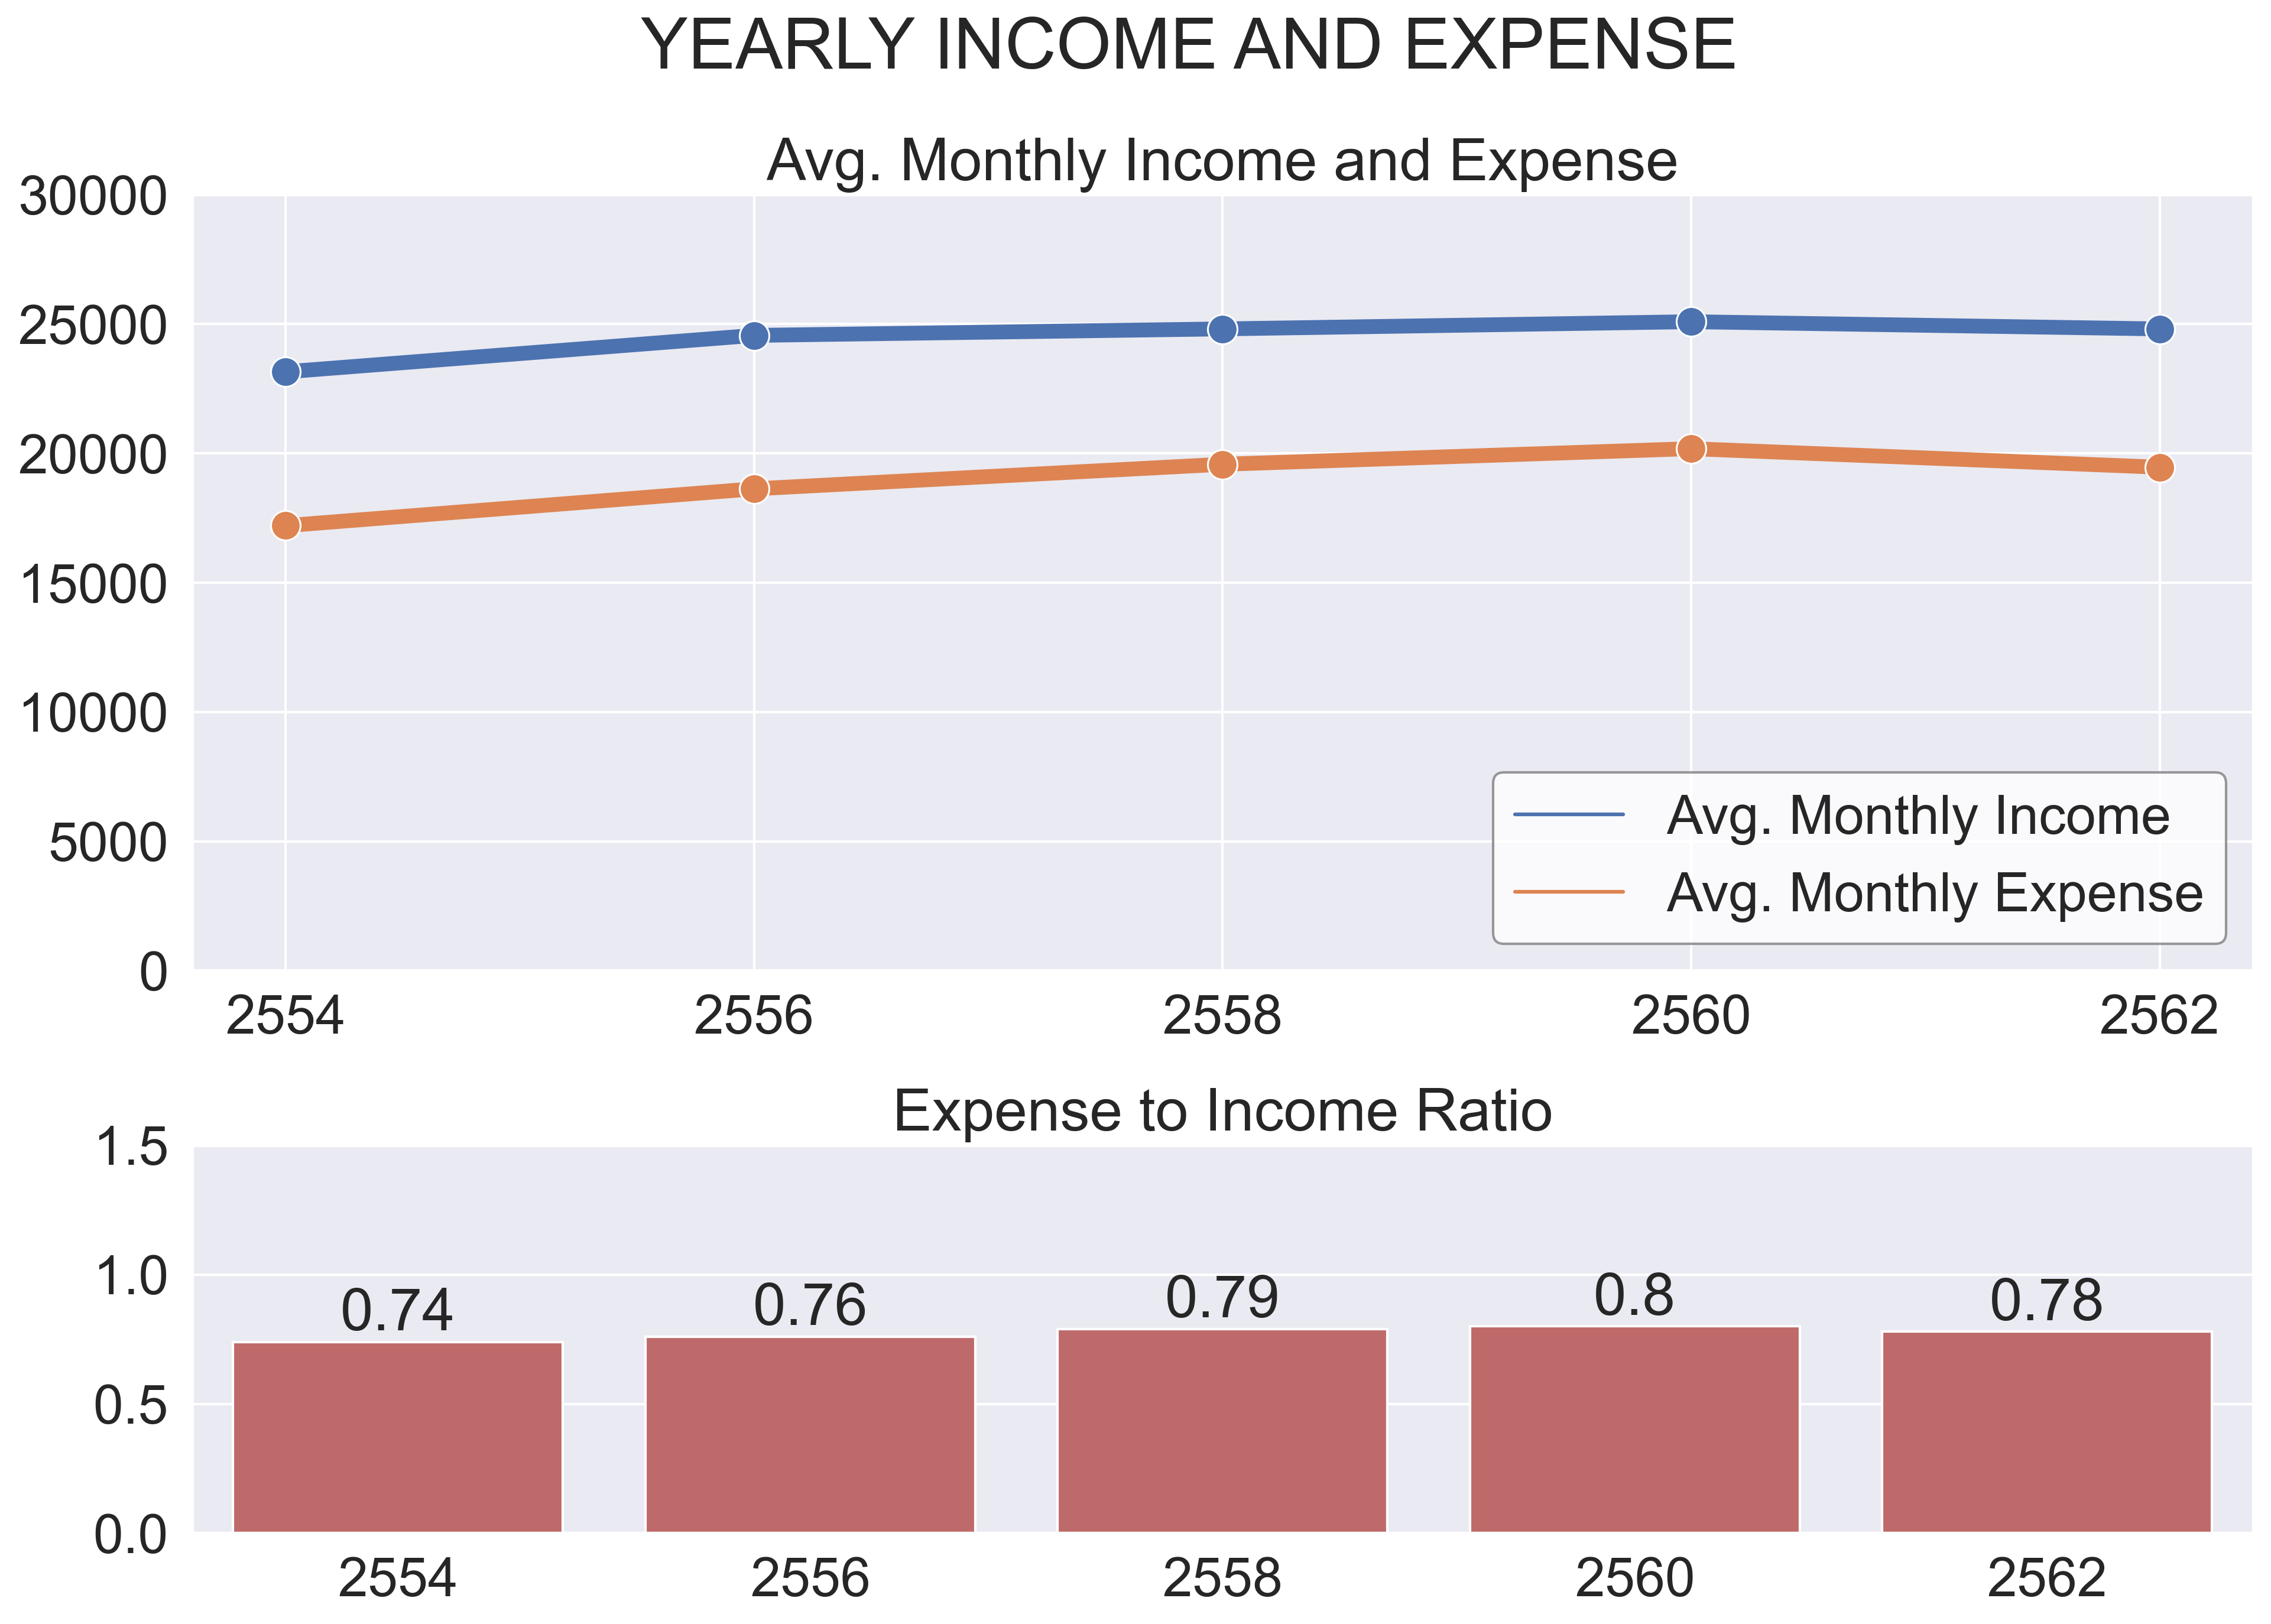

In [47]:
# Plot
sns.set(font_scale= 2)
fig,(ax1,ax2) = plt.subplots(2,sharex=False,sharey=False,figsize=(15, 10),dpi=300,gridspec_kw={'height_ratios': [2, 1]})
fig.suptitle('YEARLY INCOME AND EXPENSE')
fig.subplots_adjust(hspace=0.3)

ax1 = sns.lineplot(data= line_plot_yr, x='year', y='value', hue='variable',marker='o',linewidth=6,markersize=12,ax=ax1)
ax1.legend_.set_title(None)
ax1.set_ylim(bottom=0, top=30000)
ax1.set(ylabel=None,xlabel=None,title='Avg. Monthly Income and Expense')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.legend(frameon=True,loc=4,edgecolor = 'grey',facecolor = 'white')

ax2 = sns.barplot(data= df_merge_yr, x='year', y='Ratio Expense/Income',color='#CD5C5C',ax=ax2)
ax2.set(ylabel=None,xlabel=None,title = 'Expense to Income Ratio')
ax2.bar_label(ax2.containers[0])
ax2.set_ylim(bottom=0, top=1.5)

# 3.2 Income and Expense Seperated by Region

In [48]:
#Only Data from year 2560 and 2562 will be used to average income and expense by region [2554,2556,2558 is too far in the past]

#Income
#Group Income by Region (avg. Year 2560 and 2562)

drop_year = [2554,2556,2558]
df_in2 = df_in
for yr in drop_year:
    df_in2 = df_in2.drop(df_in.index[df_in['year'] == yr])
group_in_reg = df_in2.groupby(['year','region','source_income'])
agg_in_reg = group_in_reg.agg('mean')
group_in_reg = agg_in_reg.groupby(['year','region'])
agg_in_reg = group_in_reg.agg('sum')
group_in_reg = agg_in_reg.groupby(['region'])
df_in2_reg = group_in_reg.agg('mean').reset_index()

display(df_in2_reg)

,region,value
0,กรุงเทพ นนทบุรี ปทุมธานี และสมุทรปราการ,32027.30
1,ภาคกลาง,25521.80
2,ภาคตะวันออกเฉียงเหนือ,21198.05
3,ภาคเหนือ,20002.25
4,ภาคใต้,26002.40


In [49]:
#Expense Data
#Group Expense by Region (avg. Year 2560 and 2562)

df_x2 = df_x
for yr in drop_year:
    df_x2 = df_x2.drop(df_x.index[df_x['year'] == yr])

group_x_reg = df_x2.groupby(['year','region','type_expenditur'])
agg_x_reg = group_x_reg.agg('mean')
group_x_reg = agg_x_reg.groupby(['year','region'])
agg_x_reg = group_x_reg.agg('sum')
group_x_reg = agg_x_reg.groupby(['region'])
df_x2_reg = group_x_reg.agg('mean').reset_index()

display(df_x2_reg)

,region,value
0,กทม. นนทบุรี ปทุมธานี และสมุทรปราการ,27495.025333
1,ภาคกลาง,19454.721000
2,ภาคตะวันออกเฉียงเหนือ,16906.898500
3,ภาคเหนือ,15762.714000
4,ภาคใต้,19492.743000


In [50]:
#Merge Region income and expense data

df_in2_reg_ = df_in2_reg.replace('กรุงเทพ นนทบุรี ปทุมธานี และสมุทรปราการ','กทม. นนทบุรี ปทุมธานี และสมุทรปราการ')
df_merge_reg = pd.merge(df_in2_reg_,df_x2_reg, left_on ='region', right_on ='region', how ='left' )
df_merge_reg = df_merge_reg.astype({'value_x': int, 'value_y': int})
df_merge_reg['Avg. Monthly Saving'] = df_merge_reg['value_x'] - df_merge_reg['value_y']
df_merge_reg.rename(columns = {'value_x':'Avg. Monthly Income','value_y':'Avg. Monthly Expense'},inplace=True)
df_merge_reg = df_merge_reg.replace('กทม. นนทบุรี ปทุมธานี และสมุทรปราการ','กทม. นน. ปทุม. สุมุทรปราการ') 

display(df_merge_reg)

,region,Avg. Monthly Income,Avg. Monthly Expense,Avg. Monthly Saving
0,กทม. นน. ปทุม. สุมุทรปราการ,32027,27495,4532
1,ภาคกลาง,25521,19454,6067
2,ภาคตะวันออกเฉียงเหนือ,21198,16906,4292
3,ภาคเหนือ,20002,15762,4240
4,ภาคใต้,26002,19492,6510


In [51]:
# Preparing Data for plot (from wide to long)

bar_plot_reg = df_merge_reg.melt( id_vars=['region'],value_vars=['Avg. Monthly Income','Avg. Monthly Expense','Avg. Monthly Saving'] )   
display(bar_plot_reg)

,region,variable,value
0,กทม. นน. ปทุม. สุมุทรปราการ,Avg. Monthly Income,32027
1,ภาคกลาง,Avg. Monthly Income,25521
2,ภาคตะวันออกเฉียงเหนือ,Avg. Monthly Income,21198
3,ภาคเหนือ,Avg. Monthly Income,20002
4,ภาคใต้,Avg. Monthly Income,26002
5,กทม. นน. ปทุม. สุมุทรปราการ,Avg. Monthly Expense,27495
6,ภาคกลาง,Avg. Monthly Expense,19454
7,ภาคตะวันออกเฉียงเหนือ,Avg. Monthly Expense,16906
8,ภาคเหนือ,Avg. Monthly Expense,15762
9,ภาคใต้,Avg. Monthly Expense,19492


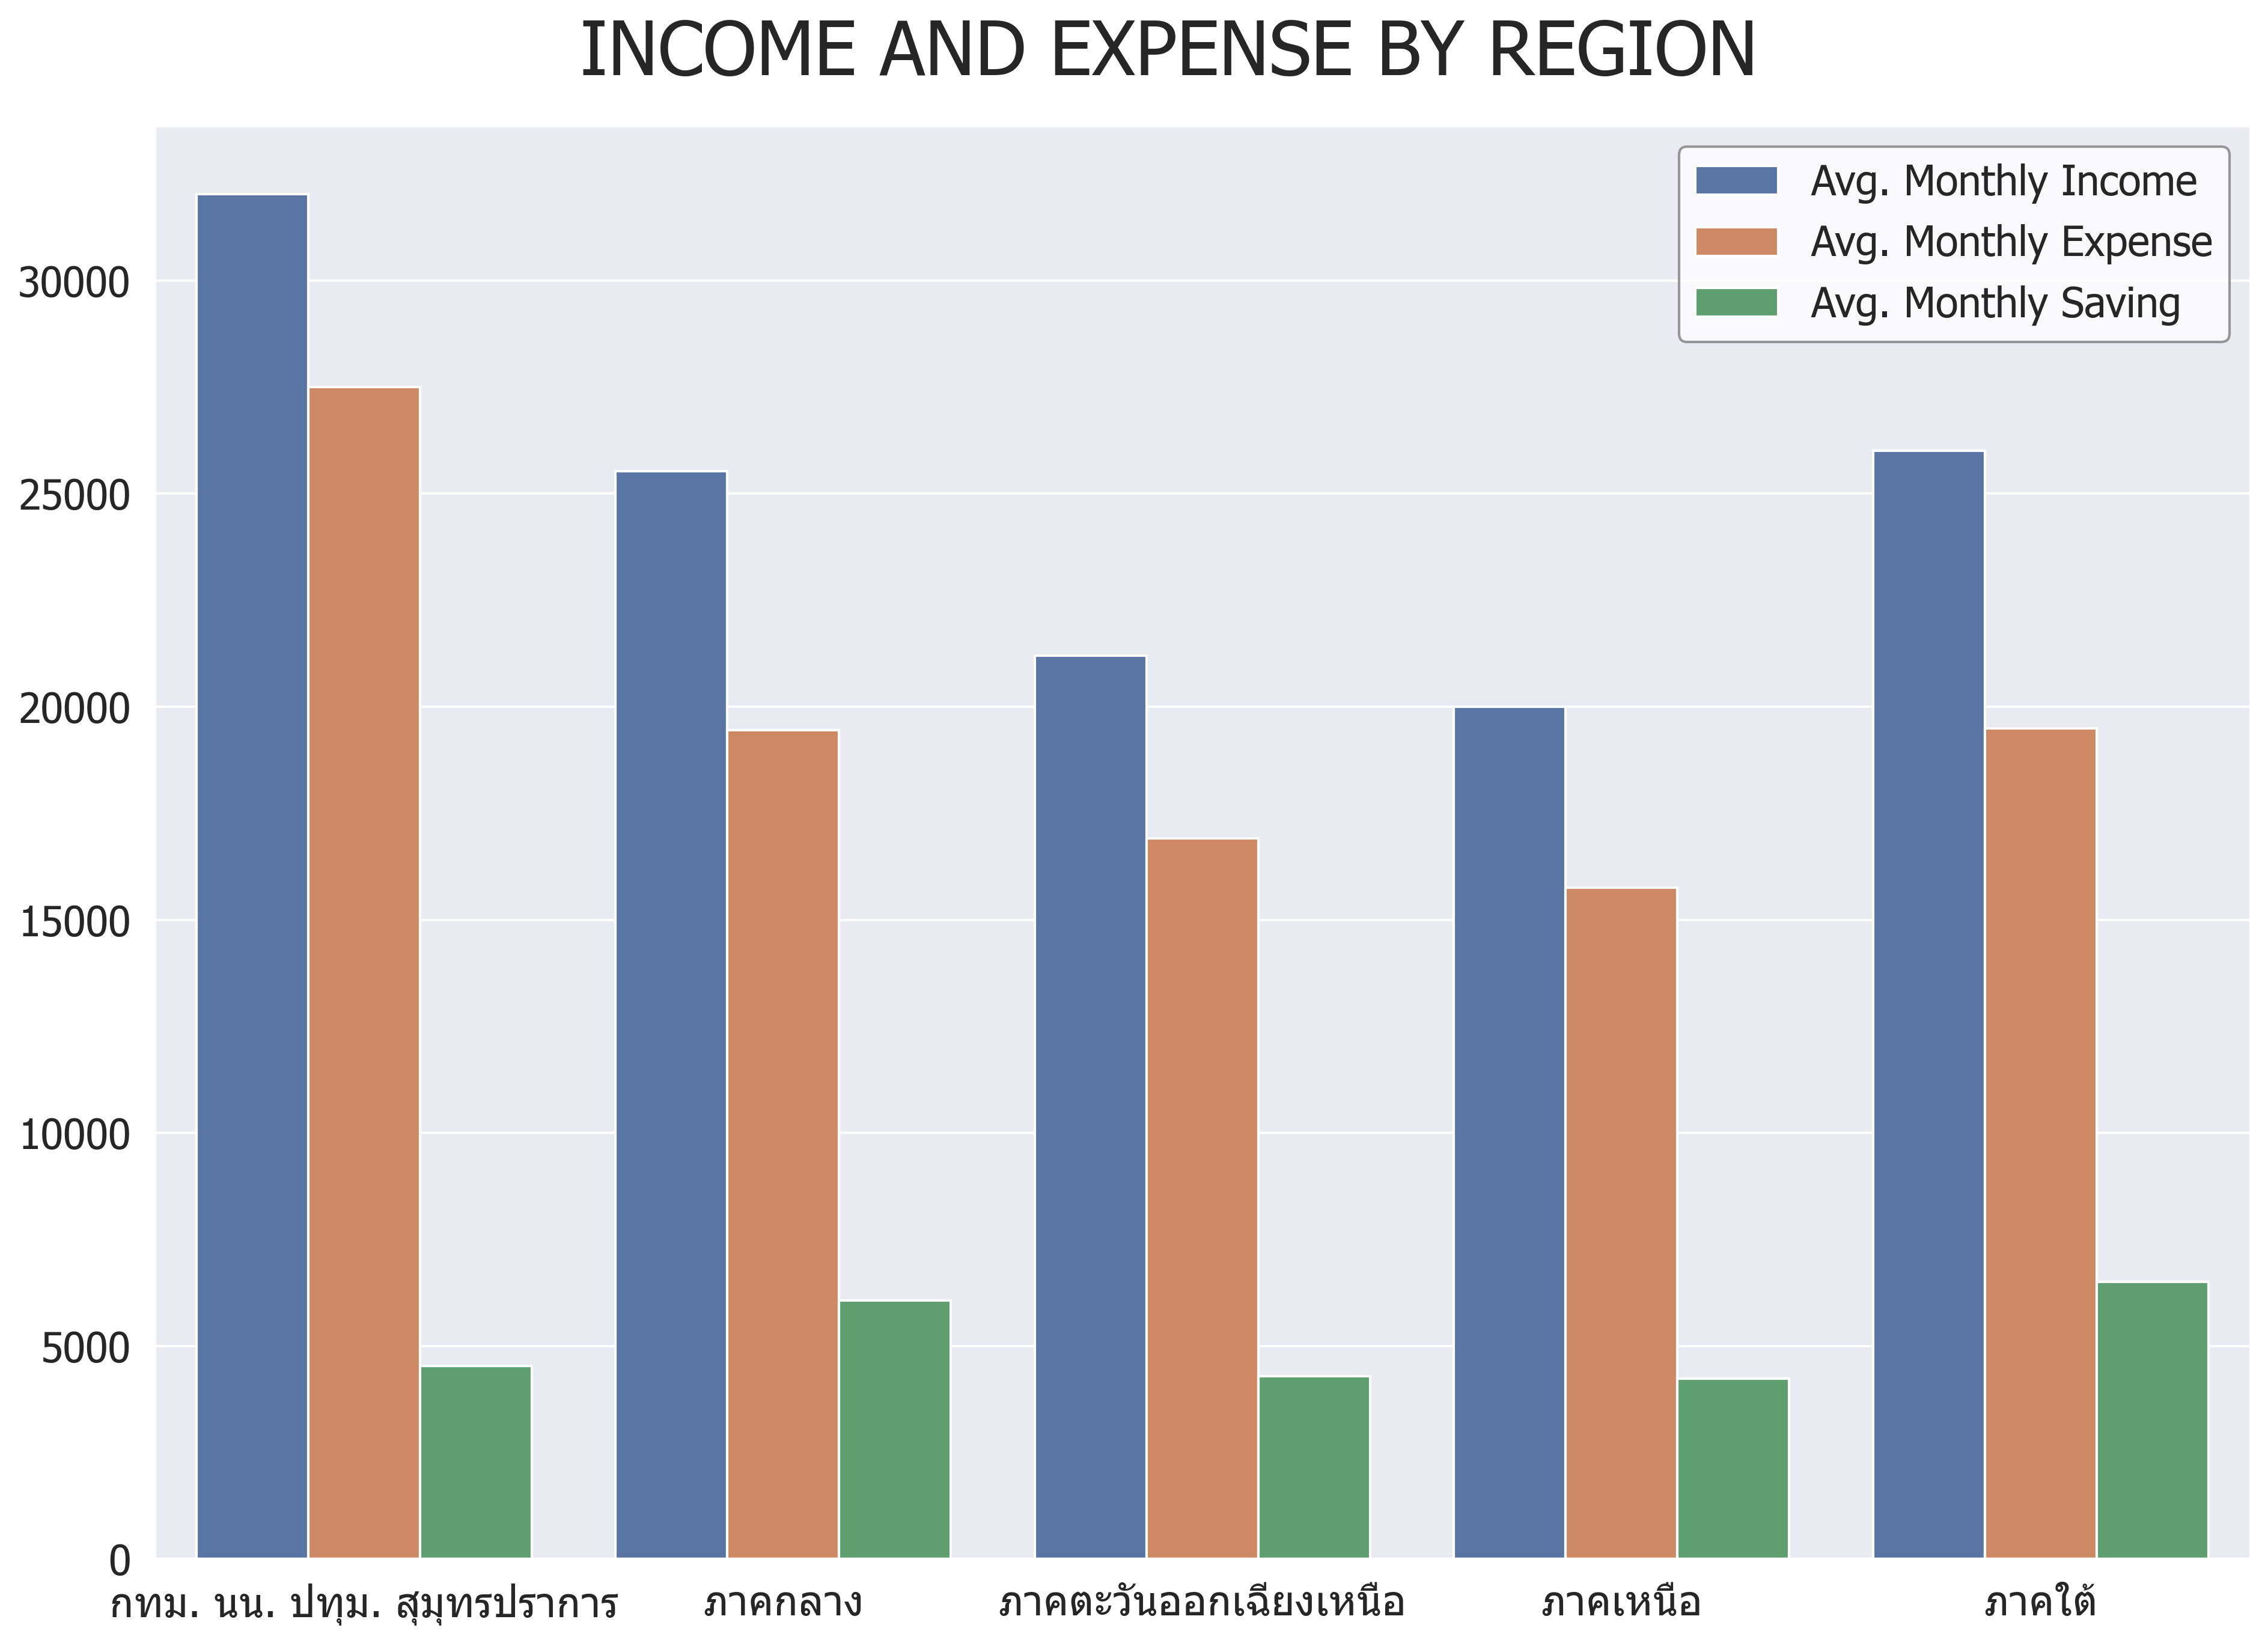

In [52]:
# Plot

sns.set(font='Tahoma',font_scale =1.5)

fig,ax = plt.subplots(figsize=(15, 10),dpi=300)
fig.suptitle('INCOME AND EXPENSE BY REGION',size=30)
fig.subplots_adjust(top=9.2/10)

sns.barplot(data=bar_plot_reg, x='region', y='value', hue='variable',ax=ax)

ax.set( ylabel= None, xlabel= None)
ax.legend_.set_title(None)
ax.legend(frameon=True,loc=1,edgecolor = 'grey',facecolor = 'white')



# 3.2 Income and Expense Categories

In [53]:
df_in2.info()
df_in2.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 639 to 2639
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           500 non-null    int64  
 1   region         500 non-null    object 
 2   source_income  500 non-null    object 
 3   soc_eco_class  500 non-null    object 
 4   value          500 non-null    float64
 5   unit           500 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.3+ KB


,year,region,source_income,soc_eco_class,value,unit
639,2560,กรุงเทพ นนทบุรี ปทุมธานี และสมุทรปราการ,รายได้ประจำที่เป็นตัวเงิน (รายได้จากการทำงาน),ผู้ถือครองทำการเกษตร การปลูกพืช การเลี้ยงสัตว์...,14678.0,บาทต่อเดือน
640,2560,กรุงเทพ นนทบุรี ปทุมธานี และสมุทรปราการ,รายได้ประจำที่เป็นตัวเงิน (รายได้จากการทำงาน),ผู้ถือครองทำการเกษตร การปลูกพืช การเลี้ยงสัตว์...,26591.0,บาทต่อเดือน
641,2560,กรุงเทพ นนทบุรี ปทุมธานี และสมุทรปราการ,รายได้ประจำที่เป็นตัวเงิน (รายได้จากการทำงาน),ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,18014.0,บาทต่อเดือน


In [54]:
df_x2.info()
df_x2.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 17 to 4619
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             1200 non-null   int64  
 1   region           1200 non-null   object 
 2   type_expenditur  1200 non-null   object 
 3   soc_eco_class    1200 non-null   object 
 4   value            1200 non-null   float64
 5   unit             1200 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 65.6+ KB


,year,region,type_expenditur,soc_eco_class,value,unit
17,2560,กทม. นนทบุรี ปทุมธานี และสมุทรปราการ,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (เครื่องนุ่งห่ม...,ผู้ไม่ได้ปฏิบัติงานในเชิงเศรษฐกิจ,503.15,บาทต่อเดือน
18,2560,กทม. นนทบุรี ปทุมธานี และสมุทรปราการ,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (การเดินทางและก...,ผู้ปฏิบัติงานในกระบวนการผลิต,4970.15,บาทต่อเดือน
19,2560,กทม. นนทบุรี ปทุมธานี และสมุทรปราการ,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (การจัดงานพิธี ...,คนงานทั่วไป,2.90,บาทต่อเดือน


In [55]:
group_in_type = df_in2.groupby('source_income')
df_in2_type = group_in_type.agg('mean')
df_in2_type.drop('year',inplace=True,axis=1)
df_in2_type = df_in2_type.astype({'value': int}).reset_index()
df_in2_type.sort_values(by=['value'],inplace=True,ascending=False)
df_in2_type = df_in2_type.reset_index(drop=True)
display(df_in2_type)


,source_income,value
0,รายได้ประจำที่เป็นตัวเงิน (รายได้จากการทำงาน),18944
1,รายได้ประจำที่ไม่เป็นตัวเงิน,3413
2,รายได้ประจำที่เป็นตัวเงิน (เงินได้รับเป็นการช่...,2144
3,รายได้ประจำที่เป็นตัวเงิน (รายได้จากทรัพย์สิน),234
4,รายได้ไม่ประจำ (รายได้ที่เป็นตัวเงิน),212


In [56]:
group_x_type = df_x2.groupby(['region','type_expenditur','soc_eco_class'])
df_x2_type = group_x_type.agg('mean')
group_x_type = df_x2.groupby(['type_expenditur','soc_eco_class'])
df_x2_type = group_x_type.agg('mean')
group_x_type = df_x2.groupby(['type_expenditur'])
df_x2_type = group_x_type.agg('mean')

df_x2_type.drop('year',inplace=True,axis=1)
df_x2_type = df_x2_type.astype({'value': int}).reset_index()
df_x2_type['value'] = -df_x2_type['value'].abs()
df_x2_type.sort_values(by=['value'],inplace=True,ascending=False)
df_x2_type = df_x2_type.reset_index(drop=True)
display(df_x2_type)

,type_expenditur,value
0,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (การจัดงานพิธี ...,-97
1,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (ยาสูบ หมาก ยาน...,-108
2,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (เครื่องดื่มที่...,-199
3,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (เวชภัณฑ์และค่า...,-291
4,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (การบันเทิง การ...,-316
5,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (การศึกษา),-324
6,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (เครื่องนุ่งห่ม...,-444
7,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (ค่าใช้จ่ายส่วน...,-674
8,ค่าใช้จ่ายที่ไม่เกี่ยวกับการอุปโภคบริโภค,-2509
9,ค่าใช้จ่ายเพื่อการอุปโภคบริโภค (ที่อยู่อาศัย เ...,-3948


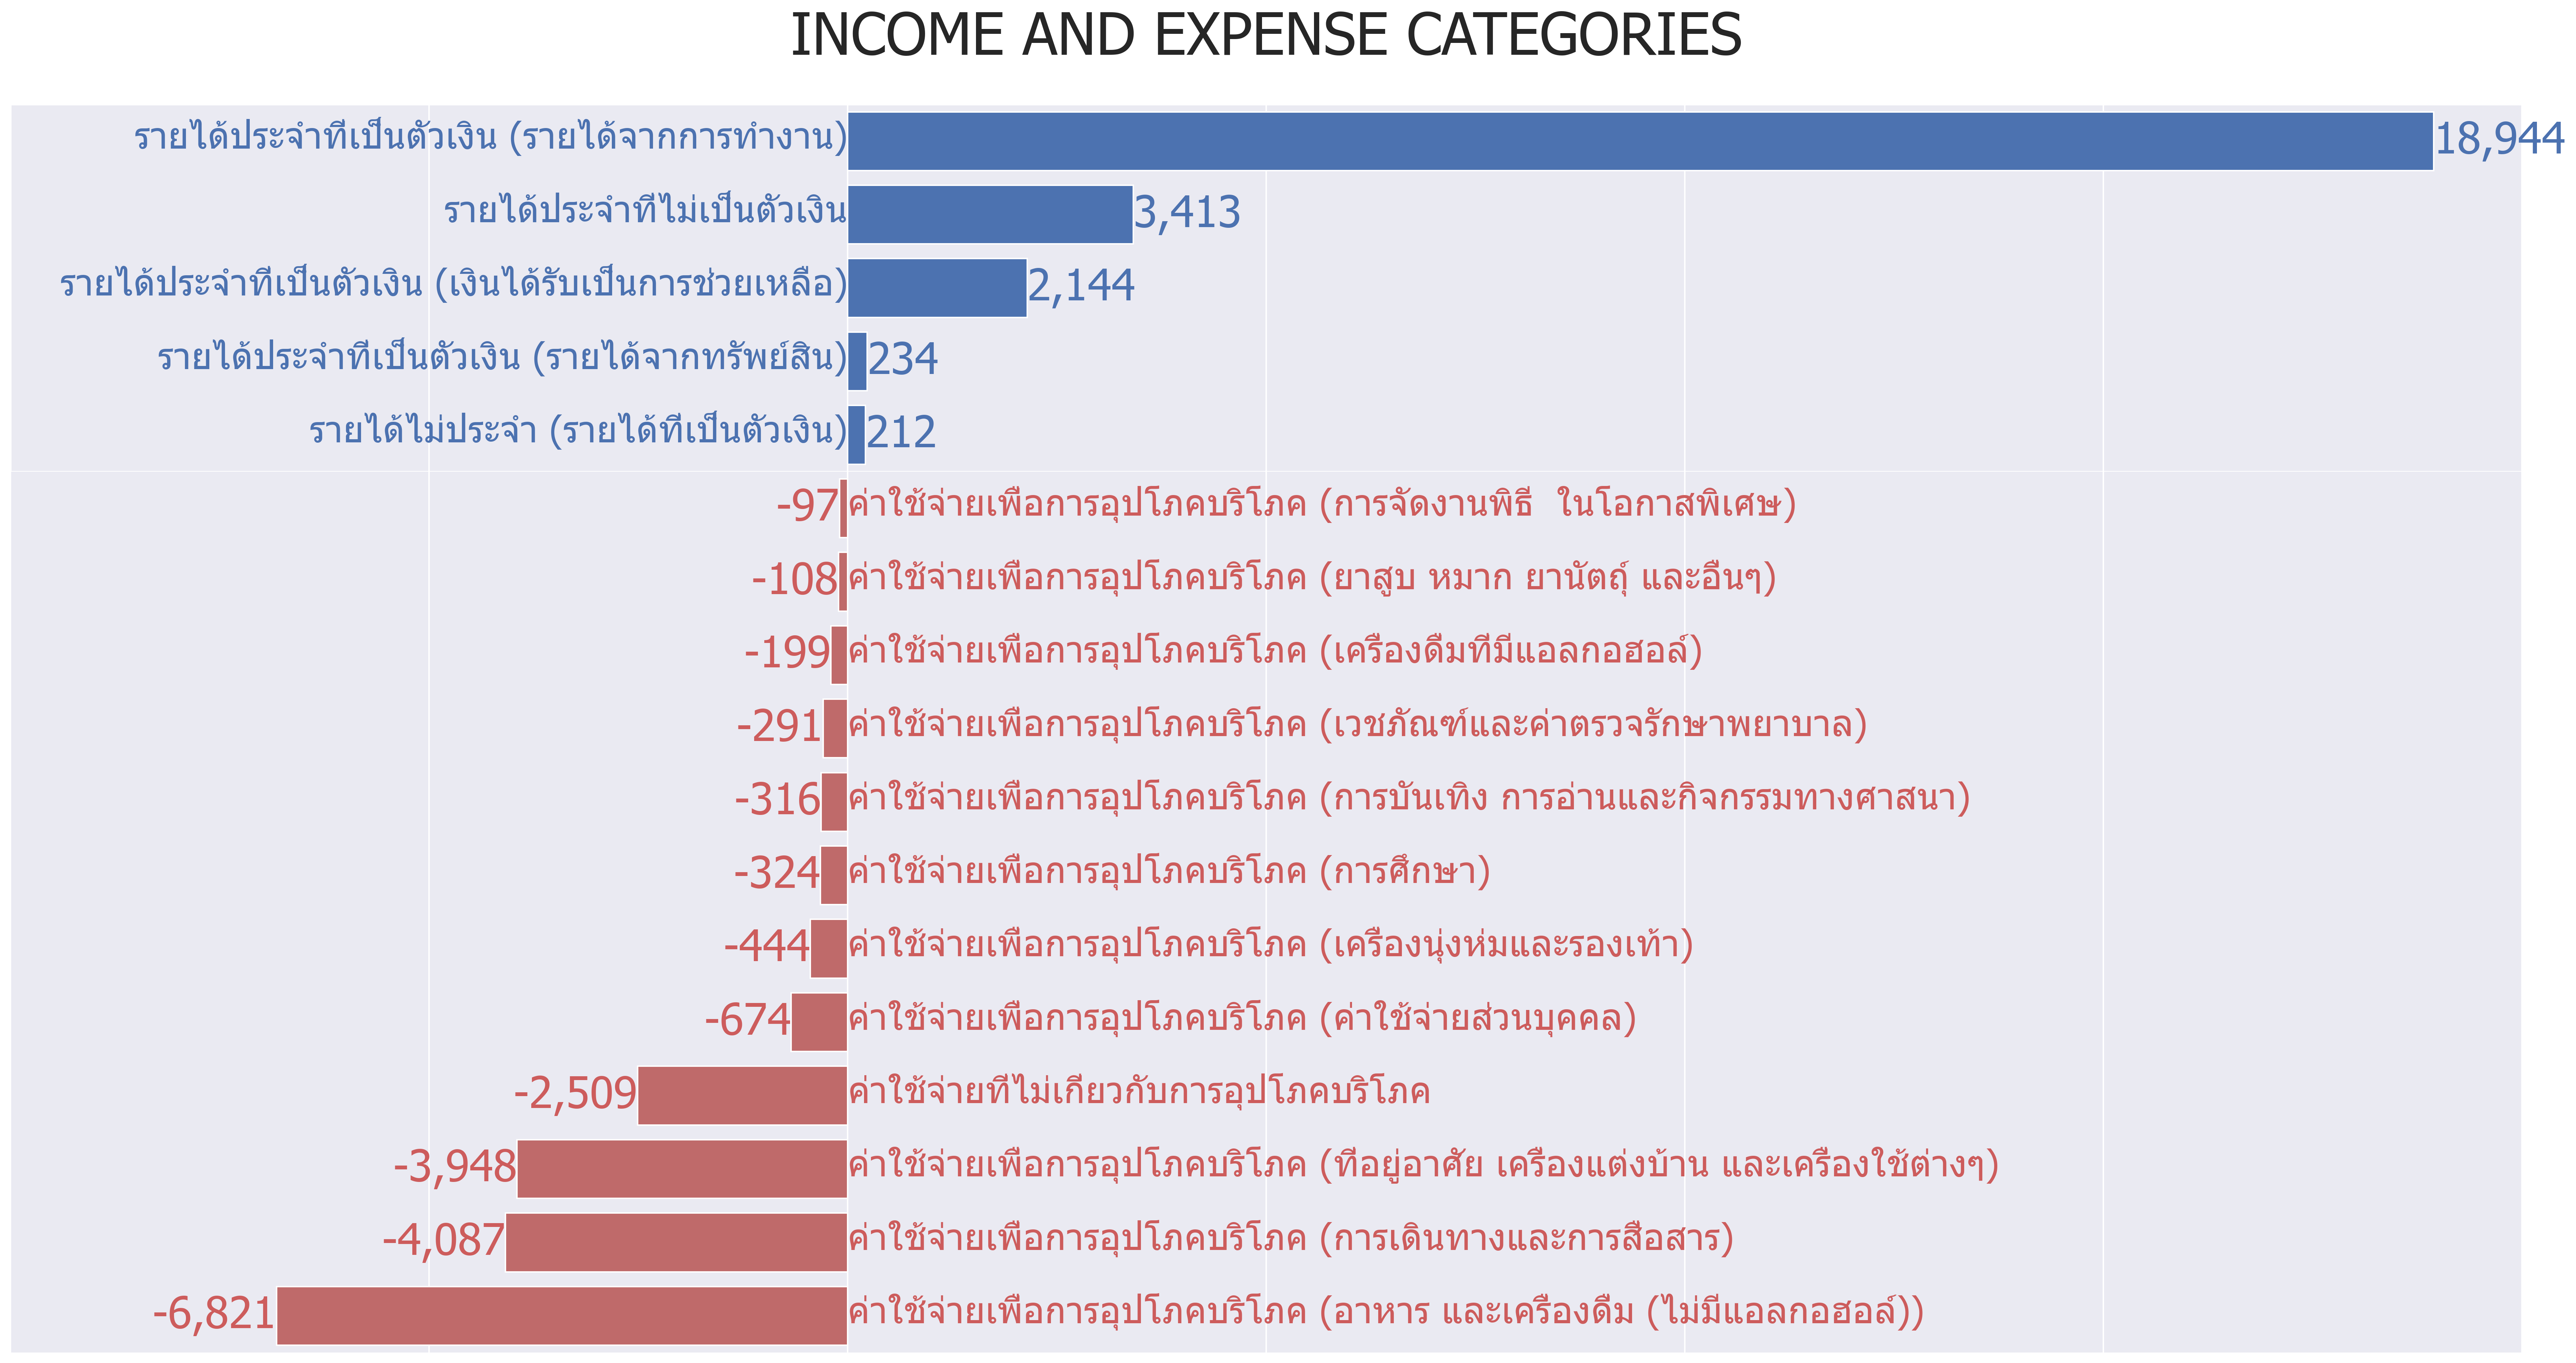

In [57]:
sns.set(font='Tahoma',font_scale =2,rc={'axes.facecolor':'#EAEAF2'})
fig,(ax1,ax2) = plt.subplots(2,sharex=False,sharey=False,figsize=(15, 15),dpi=300,gridspec_kw={'height_ratios': [5, 12]})
fig.suptitle('INCOME AND EXPENSE CATEGORIES',size=40)
fig.subplots_adjust(hspace=0,left=-0.3,right=1.3,top=13.8/15)

sns.barplot(data=df_in2_type, x = 'value', y = 'source_income',ax=ax1,color='#4C72B0',facecolor=None)
ax1.set(xlim=(-10000,20000),ylabel=None,xlabel=None)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.bar_label(ax1.containers[0],labels=[f'{x:,.0f}' for x in ax1.containers[0].datavalues],color='#4C72B0',size=30)

sns.barplot(data=df_x2_type, x ='value', y = 'type_expenditur',ax=ax2,color='#CD5C5C')
sns.despine(fig=None, ax=ax2, top=True, right=True, left=True, bottom=True)
ax2.set(xlim=(-10000,20000),ylabel=None,xlabel=None)
ax2.set_yticklabels([])
ax2.set_xticklabels([])
ax2.bar_label(ax2.containers[0],labels=[f'{x:,.0f}' for x in ax2.containers[0].datavalues],color='#CD5C5C',size=30)

y_tick_in = df_in2_type['source_income'].tolist()
y_tick_x = df_x2_type['type_expenditur'].tolist()
pos_in = 0.1
pos_x = 0.1

for i in y_tick_in:
    ax1.text(0,pos_in,i,ha='right',size=25,color='#4C72B0')
    pos_in = pos_in+1
for i in y_tick_x:
    ax2.text(0,pos_x,i,ha='left',size=25,color='#CD5C5C')
    pos_x = pos_x+1  

# 3.3 Income and Expense by class

In [58]:
group_in_class = df_in2.groupby(['soc_eco_class','region','source_income'])
df_in2_class = group_in_class.agg('mean').reset_index()
group_in_class = df_in2_class.groupby(['soc_eco_class','source_income'])
df_in2_class = group_in_class.agg('mean').reset_index()
group_in_class = df_in2_class.groupby(['soc_eco_class'])
df_in2_class = group_in_class.agg('sum').reset_index()

df_in2_class.drop('year',inplace=True,axis=1)
df_in2_class = df_in2_class.astype({'value': int}).reset_index(drop=True)
df_in2_class

,soc_eco_class,value
0,คนงานทั่วไป,17271
1,คนงานเกษตร,15001
2,ผู้ดำเนินธุรกิจของตนเองที่ไม่ใช่การเกษตร,32846
3,ผู้ถือครองทำการเกษตร การปลูกพืช การเลี้ยงสัตว์...,24077
4,ผู้ถือครองทำการเกษตร การปลูกพืช การเลี้ยงสัตว์...,24642
5,ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,19754
6,ผู้ปฏิบัติงานวิชาชีพ นักวิชาการ และนักบริหารที...,50983
7,ผู้ปฏิบัติงานในกระบวนการผลิต,21075
8,ผู้ไม่ได้ปฏิบัติงานในเชิงเศรษฐกิจ,18698
9,เสมียนพนักงาน พนักงานขายและให้บริการ,25152


In [59]:
group_x_class = df_x2.groupby(['soc_eco_class','region','type_expenditur'])
df_x2_class = group_x_class.agg('mean').reset_index()
group_x_class = df_x2_class.groupby(['soc_eco_class','type_expenditur'])
df_x2_class = group_x_class.agg('mean').reset_index()
group_x_class = df_x2_class.groupby(['soc_eco_class'])
df_x2_class = group_x_class.agg('sum').reset_index()

df_x2_class.drop('year',inplace=True,axis=1)
df_x2_class = df_x2_class.astype({'value': int}).reset_index(drop=True)
df_x2_class

,soc_eco_class,value
0,คนงานทั่วไป,15205
1,คนงานเกษตร,13664
2,ผู้ดำเนินธุรกิจของตนเองที่ไม่ใช่การเกษตร,24212
3,ผู้ถือครองทำการเกษตร การปลูกพืช การเลี้ยงสัตว์...,19005
4,ผู้ถือครองทำการเกษตร การปลูกพืช การเลี้ยงสัตว์...,17572
5,ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,16191
6,ผู้ปฏิบัติงานวิชาชีพ นักวิชาการ และนักบริหารที...,37022
7,ผู้ปฏิบัติงานในกระบวนการผลิต,18057
8,ผู้ไม่ได้ปฏิบัติงานในเชิงเศรษฐกิจ,15933
9,เสมียนพนักงาน พนักงานขายและให้บริการ,21359


In [60]:
#Merge Class income and expense data

df_merge_class = pd.merge(df_in2_class,df_x2_class, left_on ='soc_eco_class', right_on ='soc_eco_class', how ='left' )
df_merge_class.rename(columns = {'value_x':'Avg. Monthly Income','value_y':'Avg. Monthly Expense'},inplace=True)
df_merge_class['Avg. Monthly Saving'] = df_merge_class['Avg. Monthly Income'] - df_merge_class['Avg. Monthly Expense']
df_merge_class.sort_values(by=['Avg. Monthly Saving'],inplace=True,ascending=False)
df_merge_class.rename(columns = {'ผู้ถือครองทำการเกษตร การปลูกพืช การเลี้ยงสัตว์ และการเพาะเลี้ยงสัตวน้ำ ซึ่งที่ดินส่วนใหญ่เป็นของตนเอง':
                                'ผู้ถือครองทำการเกษตร ปลูกพืช เลี้ยงสัตว์ ที่ดินของตนเอง',
                                'ผู้ถือครองทำการเกษตร การปลูกพืช การเลี้ยงสัตว์ และการเพาะเลี้ยงสัตวน้ำ ซึ่งที่ดินส่วนใหญ่เช่าผู้อื่น/ที่สาธารณะ/อื่น ๆ':
                                'ผู้ถือครองทำการเกษตร ปลูกพืช เลี้ยงสัตว์ ที่ดินเช่า'},inplace=True)
df_merge_class['soc_eco_class'] = df_merge_class['soc_eco_class'].str.replace('ผู้ถือครองทำการเกษตร การปลูกพืช การเลี้ยงสัตว์ และการเพาะเลี้ยงสัตวน้ำ ซึ่งที่ดินส่วนใหญ่เป็นของตนเอง','ผู้ถือครองทำการเกษตร ปลูกพืช เลี้ยงสัตว์ ที่ดินของตนเอง')
df_merge_class['soc_eco_class'] = df_merge_class['soc_eco_class'].str.replace('ผู้ถือครองทำการเกษตร การปลูกพืช การเลี้ยงสัตว์ และการเพาะเลี้ยงสัตวน้ำ ซึ่งที่ดินส่วนใหญ่เช่าผู้อื่น/ที่สาธารณะ/อื่น ๆ','ผู้ถือครองทำการเกษตร ปลูกพืช เลี้ยงสัตว์ ที่ดินเช่า')

df_merge_class = df_merge_class.reset_index(drop=True)
display(df_merge_class)

,soc_eco_class,Avg. Monthly Income,Avg. Monthly Expense,Avg. Monthly Saving
0,ผู้ปฏิบัติงานวิชาชีพ นักวิชาการ และนักบริหารที...,50983,37022,13961
1,ผู้ดำเนินธุรกิจของตนเองที่ไม่ใช่การเกษตร,32846,24212,8634
2,ผู้ถือครองทำการเกษตร ปลูกพืช เลี้ยงสัตว์ ที่ดิ...,24642,17572,7070
3,ผู้ถือครองทำการเกษตร ปลูกพืช เลี้ยงสัตว์ ที่ดิ...,24077,19005,5072
4,เสมียนพนักงาน พนักงานขายและให้บริการ,25152,21359,3793
5,ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,19754,16191,3563
6,ผู้ปฏิบัติงานในกระบวนการผลิต,21075,18057,3018
7,ผู้ไม่ได้ปฏิบัติงานในเชิงเศรษฐกิจ,18698,15933,2765
8,คนงานทั่วไป,17271,15205,2066
9,คนงานเกษตร,15001,13664,1337


In [61]:
bar_plot_class = df_merge_class.melt( id_vars=['soc_eco_class'],value_vars=['Avg. Monthly Income','Avg. Monthly Expense','Avg. Monthly Saving'] )   
display(bar_plot_class.head(5))
display(bar_plot_class.tail(5))

,soc_eco_class,variable,value
0,ผู้ปฏิบัติงานวิชาชีพ นักวิชาการ และนักบริหารที...,Avg. Monthly Income,50983
1,ผู้ดำเนินธุรกิจของตนเองที่ไม่ใช่การเกษตร,Avg. Monthly Income,32846
2,ผู้ถือครองทำการเกษตร ปลูกพืช เลี้ยงสัตว์ ที่ดิ...,Avg. Monthly Income,24642
3,ผู้ถือครองทำการเกษตร ปลูกพืช เลี้ยงสัตว์ ที่ดิ...,Avg. Monthly Income,24077
4,เสมียนพนักงาน พนักงานขายและให้บริการ,Avg. Monthly Income,25152


,soc_eco_class,variable,value
25,ผู้ทำการประมง ป่าไม้ ล่าสัตว์ หาของป่า และบริก...,Avg. Monthly Saving,3563
26,ผู้ปฏิบัติงานในกระบวนการผลิต,Avg. Monthly Saving,3018
27,ผู้ไม่ได้ปฏิบัติงานในเชิงเศรษฐกิจ,Avg. Monthly Saving,2765
28,คนงานทั่วไป,Avg. Monthly Saving,2066
29,คนงานเกษตร,Avg. Monthly Saving,1337


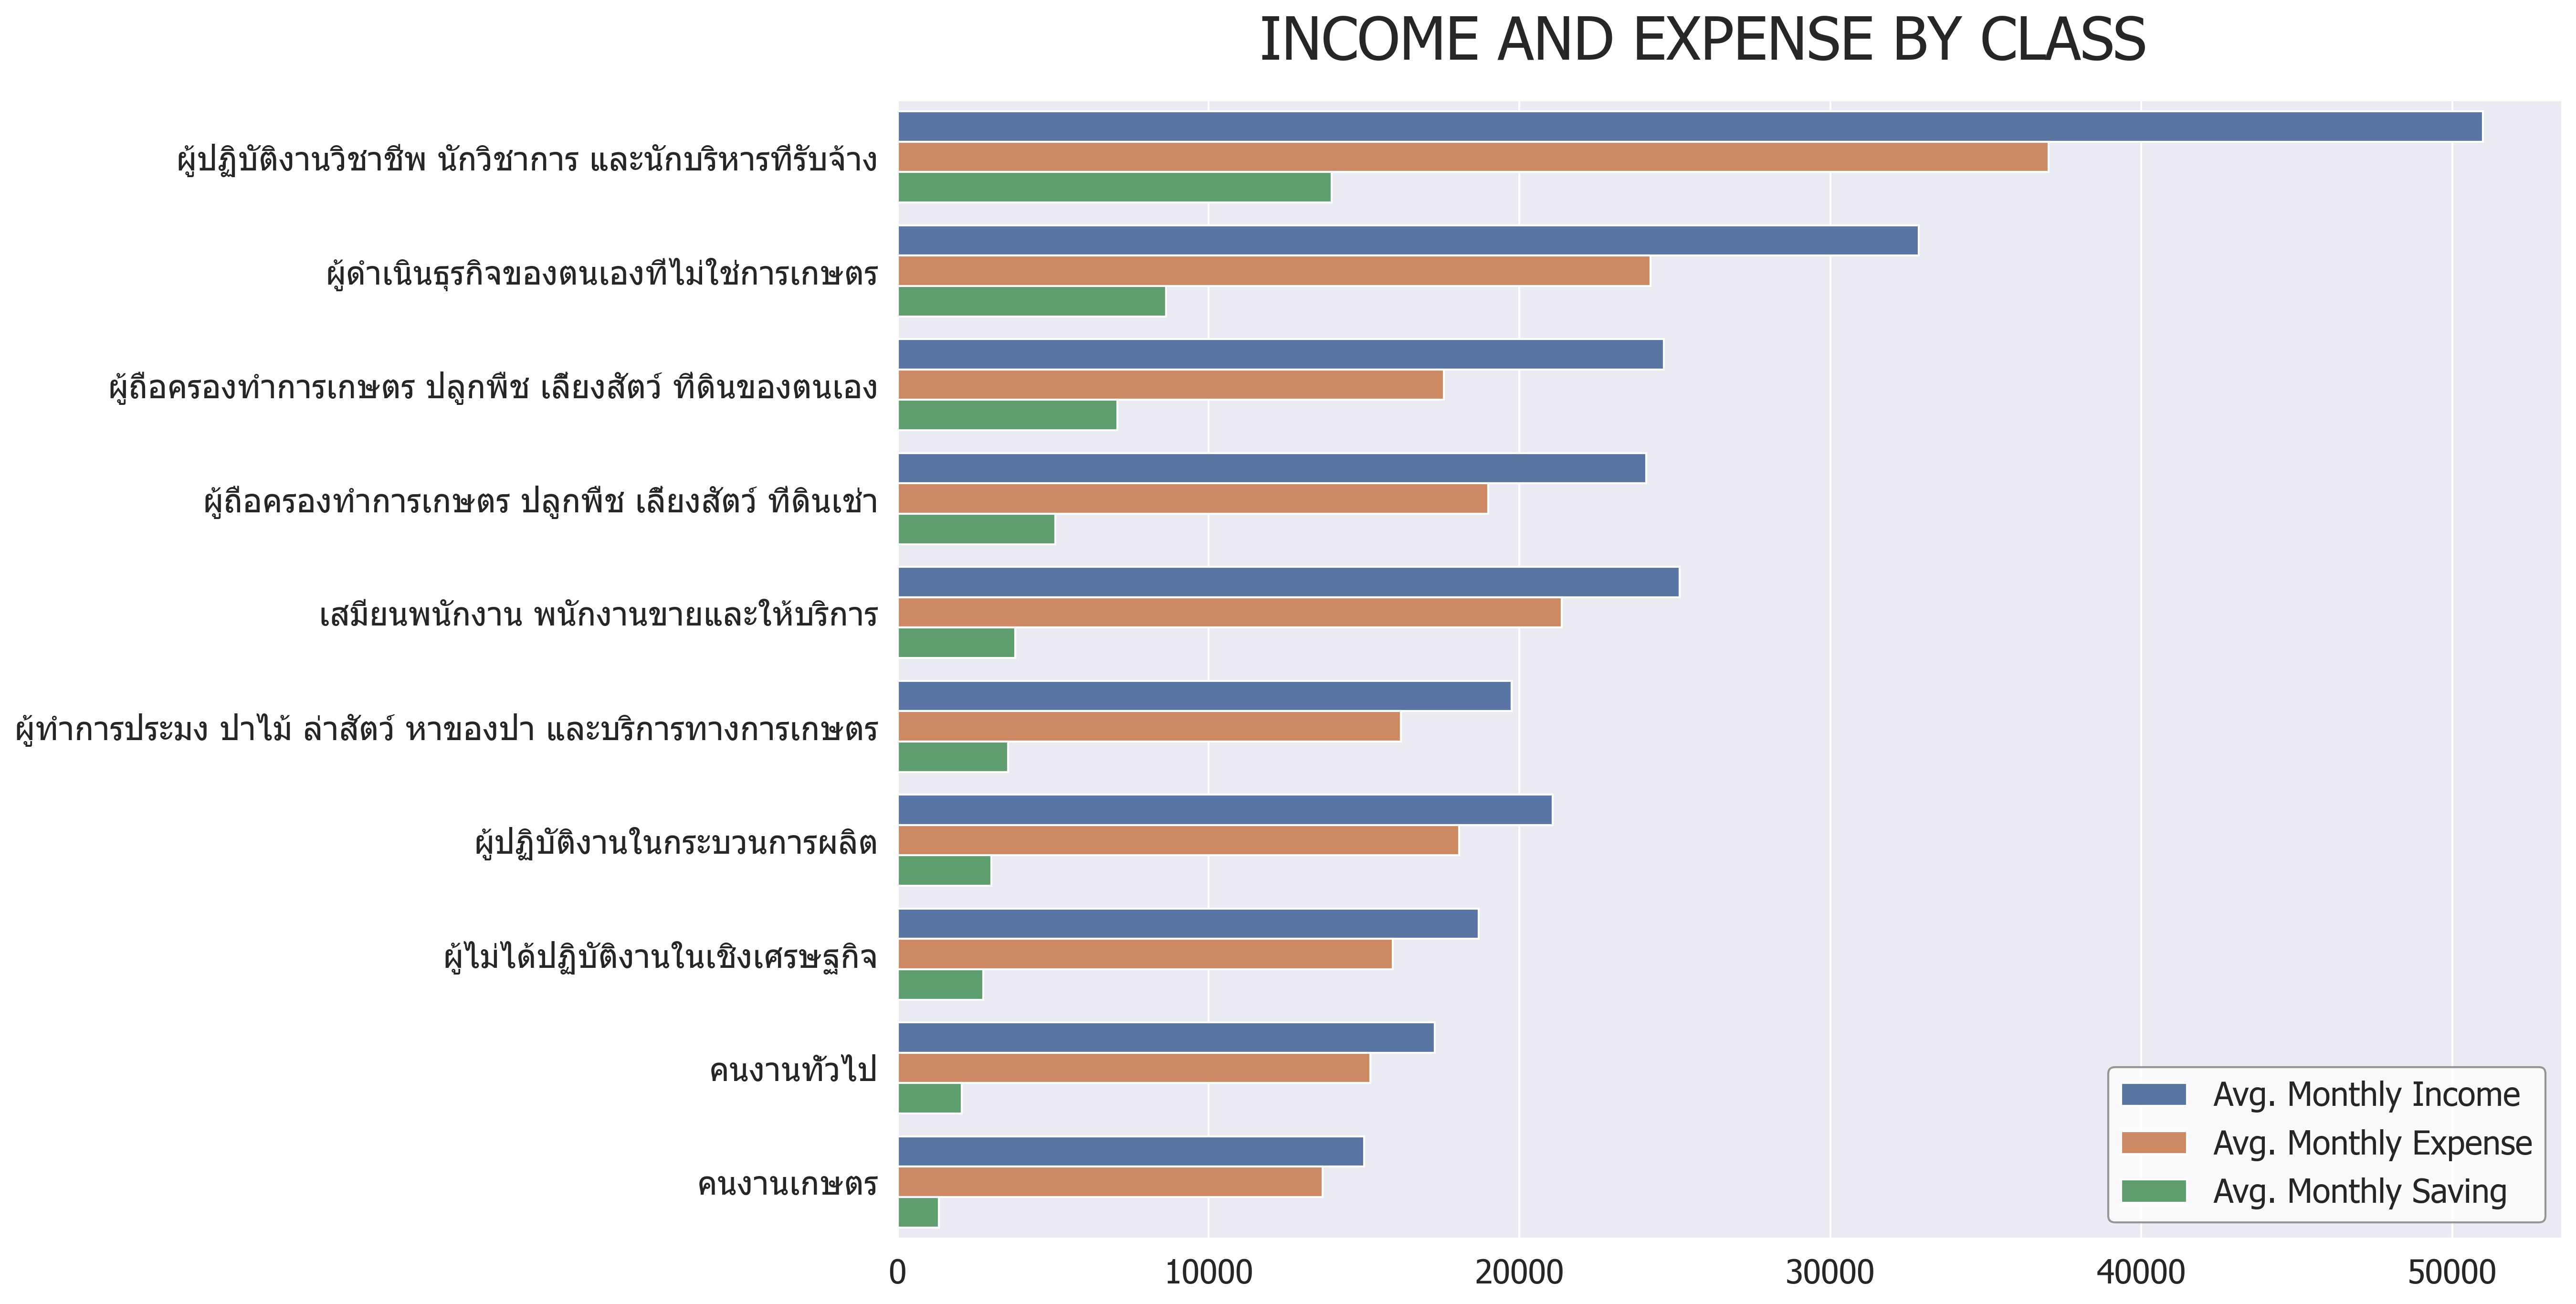

In [62]:
sns.set(font='Tahoma',font_scale =1.5)

fig,ax = plt.subplots(figsize=(15, 10),dpi=300)
fig.suptitle('INCOME AND EXPENSE BY CLASS',size=30)
fig.subplots_adjust(top=9.2/10)

sns.barplot(data=bar_plot_class, x='value', y='soc_eco_class', hue='variable',ax=ax)
ax.set( ylabel= None, xlabel= None)
ax.legend_.set_title(None)
ax.legend(frameon=True,loc=4,edgecolor = 'grey',facecolor = 'white')


In [63]:
df_in_argi = df_in[(df_in['soc_eco_class'] == 'คนงานเกษตร')]

group_in_argi = df_in_argi.groupby(['year','region','soc_eco_class','source_income'])
df_in_argi = group_in_argi.agg('mean').reset_index()
group_in_argi = df_in_argi.groupby(['year','region','soc_eco_class'])
df_in_argi = group_in_argi.agg('sum').reset_index()
df_in_argi = df_in_argi.drop(columns=['soc_eco_class'])
df_in_argi = df_in_argi.replace('กรุงเทพ นนทบุรี ปทุมธานี และสมุทรปราการ','กทม. นนทบุรี ปทุมธานี และสมุทรปราการ') 

In [64]:
df_x_argi = df_x[(df_x['soc_eco_class'] == 'คนงานเกษตร')]

group_x_argi = df_x_argi.groupby(['year','region','soc_eco_class','type_expenditur'])
df_x_argi = group_x_argi.agg('mean').reset_index()
group_x_argi = df_x_argi.groupby(['year','region','soc_eco_class'])
df_x_argi = group_x_argi.agg('sum').reset_index()
df_x_argi = df_x_argi.drop(columns=['soc_eco_class'])

In [65]:
df_merge_argi = pd.merge(df_in_argi,df_x_argi, left_on =['year','region'], right_on =['year','region'], how ='left' )
df_merge_argi.rename(columns = {'value_x':'Avg. Monthly Income','value_y':'Avg. Monthly Expense'},inplace=True)
df_merge_argi['Avg. Monthly Saving'] = df_merge_argi['Avg. Monthly Income'] - df_merge_argi['Avg. Monthly Expense']
df_merge_argi

,year,region,Avg. Monthly Income,Avg. Monthly Expense,Avg. Monthly Saving
0,2554,กทม. นนทบุรี ปทุมธานี และสมุทรปราการ,14242.0,10156.00,4086.00
1,2554,ภาคกลาง,10910.0,10029.80,880.20
2,2554,ภาคตะวันออกเฉียงเหนือ,12248.0,10302.00,1946.00
3,2554,ภาคเหนือ,10764.0,8621.00,2143.00
4,2554,ภาคใต้,17780.0,15685.00,2095.00
5,2556,กทม. นนทบุรี ปทุมธานี และสมุทรปราการ,16170.0,14463.66,1706.34
6,2556,ภาคกลาง,12712.0,11186.98,1525.02
7,2556,ภาคตะวันออกเฉียงเหนือ,11249.0,10497.97,751.03
8,2556,ภาคเหนือ,12006.0,9553.87,2452.13
9,2556,ภาคใต้,16314.0,14717.84,1596.16


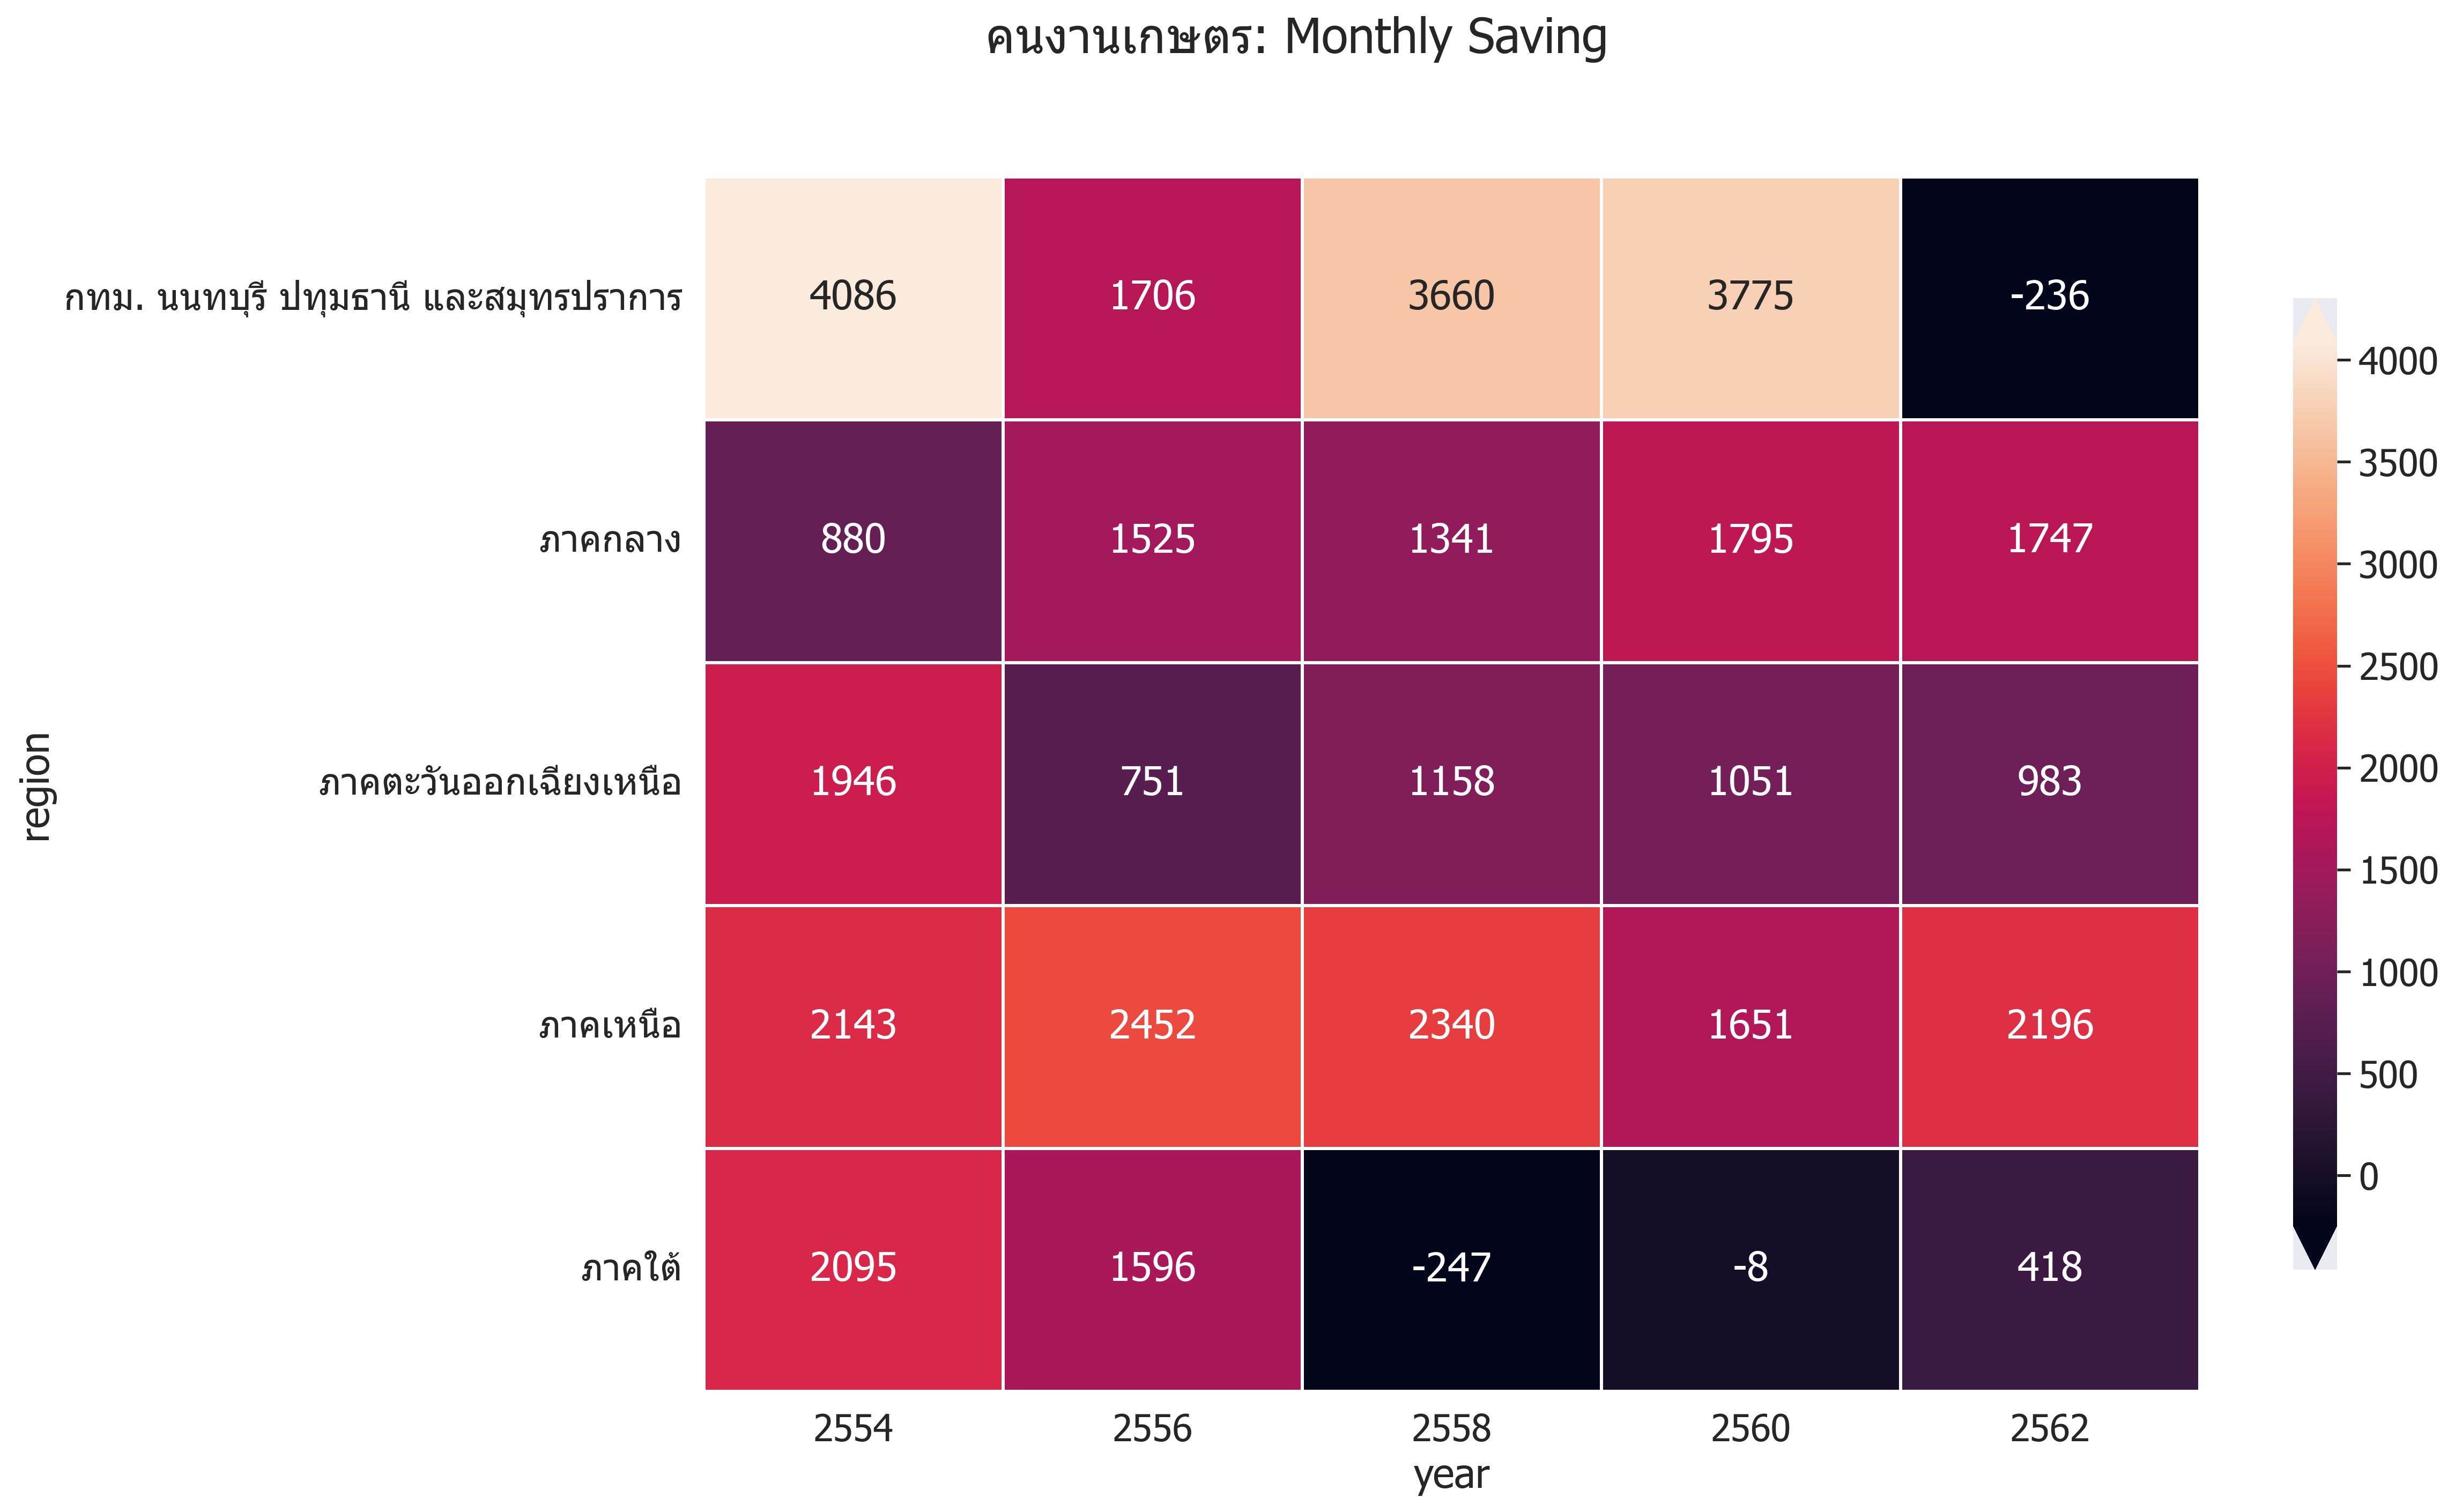

In [66]:
df_plot_low = df_merge_argi.drop(columns = ['Avg. Monthly Income','Avg. Monthly Expense'])
pivot = df_plot_low.pivot_table(index= 'region',columns='year',values = 'Avg. Monthly Saving')

fig,ax = plt.subplots(figsize=(15, 10),dpi=300)
fig.suptitle('คนงานเกษตร: Monthly Saving',ha='right')
ax = sns.heatmap(pivot,linewidths=1,annot=True,fmt='.0f',cbar_kws ={"shrink":.8,'extend':'both'})
